Assili Elyas  
MAIN 3  
28603792

<center>

# **PROJET PROGRAMMMATION EN PYTHON**

## Qu'est ce qui rend une musique populaire ?

<center>

<img src='musicquiz.jpg' width="800"  height="300">

---


### SOMMAIRE

* [Partie 1](#Partie1)
* [Partie 2](#Partie2)
* [Partie 3](#Partie3)



---

Importons les differentes bibliothèques que je vais utiliser durant ce projet

In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score


*Ce projet a été effectué sur un notebook à fond blanc, je vous conseille de le configurer ainsi afin que vous puissiez voir certaines de mes figures*

---

<center>



### **Partie 1 : Traitement des données / Data Cleaning** <a class="anchor" id="Partie1"></a>

<center>

#### 1) &nbsp; Presentation des données

Nos données se situent dans un fichier csv, importons les sur mon notebook afin d'y pouvoir travailler dessus.

Remarque :     
Mes données seront stockées dans une variable que je vais appeler **donnees_musique** .

In [2]:
donnees_musique=pd.read_csv("data_music.csv")

Pour avoir un apercu global de nos données, on peut les afficher directement

In [3]:
donnees_musique

,acousticness,artists,danceability,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year,duration_min
0,0.991000,['Mamie Smith'],0.598,0.224,0.0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5.0,0.3790,-12.628,0.0,Keep A Song In Your Soul,12.0,1920,0.0936,149.976,0.6340,1920.0,2.805550
1,0.643000,"[""Screamin' Jay Hawkins""]",0.852,0.517,0.0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5.0,0.0809,-7.261,0.0,I Put A Spell On You,7.0,1920-01-05,0.0534,86.889,0.9500,1920.0,2.503333
2,0.993000,['Mamie Smith'],0.647,0.186,0.0,11m7laMUgmOKqI3oYzuhne,0.000018,0.0,0.5190,-12.098,1.0,Golfing Papa,4.0,1920,0.1740,97.600,0.6890,1920.0,2.730450
3,0.000173,['Oscar Velazquez'],0.730,0.798,0.0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2.0,0.1280,-7.311,1.0,True House Music - Xavier Santos & Carlos Gomi...,17.0,1920-01-01,0.0425,127.997,0.0422,1920.0,7.034783
4,0.295000,['Mixe'],0.704,0.707,1.0,2hJjbsLCytGsnAHfdsLejp,0.000246,10.0,0.4020,-6.036,0.0,Xuniverxe,2.0,1920-10-01,0.0768,122.076,0.2990,1920.0,2.753733
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174384,0.009170,"['DJ Combo', 'Sander-7', 'Tony T']",0.792,0.866,0.0,46LhBf6TvYjZU2SMvGZAbn,0.000060,6.0,0.1780,-5.089,0.0,The One,0.0,2020-12-25,0.0356,125.972,0.1860,2020.0,2.460250
174385,0.795000,['Alessia Cara'],0.429,0.211,0.0,7tue2Wemjd0FZzRtDrQFZd,0.000000,4.0,0.1960,-11.665,1.0,A Little More,0.0,2021-01-22,0.0360,94.710,0.2280,2021.0,2.412000
174386,0.806000,['Roger Fly'],0.671,0.589,0.0,48Qj61hOdYmUCFJbpQ29Ob,0.920000,4.0,0.1130,-12.393,0.0,Together,0.0,2020-12-09,0.0282,108.058,0.7140,2020.0,3.635783
174387,0.920000,['Taylor Swift'],0.462,0.240,1.0,1gcyHQpBQ1lfXGdhZmWrHP,0.000000,0.0,0.1130,NaN,1.0,champagne problems,69.0,2021-01-07,0.0377,171.319,0.3200,2021.0,4.066667


Sinon, on peut affichier seulement nos 5 premieres lignes du tableau.

In [4]:
donnees_musique.head()

,acousticness,artists,danceability,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year,duration_min
0,0.991000,['Mamie Smith'],0.598,0.224,0.0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5.0,0.3790,-12.628,0.0,Keep A Song In Your Soul,12.0,1920,0.0936,149.976,0.6340,1920.0,2.805550
1,0.643000,"[""Screamin' Jay Hawkins""]",0.852,0.517,0.0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5.0,0.0809,-7.261,0.0,I Put A Spell On You,7.0,1920-01-05,0.0534,86.889,0.9500,1920.0,2.503333
2,0.993000,['Mamie Smith'],0.647,0.186,0.0,11m7laMUgmOKqI3oYzuhne,0.000018,0.0,0.5190,-12.098,1.0,Golfing Papa,4.0,1920,0.1740,97.600,0.6890,1920.0,2.730450
3,0.000173,['Oscar Velazquez'],0.730,0.798,0.0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2.0,0.1280,-7.311,1.0,True House Music - Xavier Santos & Carlos Gomi...,17.0,1920-01-01,0.0425,127.997,0.0422,1920.0,7.034783
4,0.295000,['Mixe'],0.704,0.707,1.0,2hJjbsLCytGsnAHfdsLejp,0.000246,10.0,0.4020,-6.036,0.0,Xuniverxe,2.0,1920-10-01,0.0768,122.076,0.2990,1920.0,2.753733


Ou encore, les 5 dernières lignes du tableau.

In [5]:
donnees_musique.tail()

,acousticness,artists,danceability,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year,duration_min
174384,0.00917,"['DJ Combo', 'Sander-7', 'Tony T']",0.792,0.866,0.0,46LhBf6TvYjZU2SMvGZAbn,0.00006,6.0,0.178,-5.089,0.0,The One,0.0,2020-12-25,0.0356,125.972,0.186,2020.0,2.460250
174385,0.79500,['Alessia Cara'],0.429,0.211,0.0,7tue2Wemjd0FZzRtDrQFZd,0.00000,4.0,0.196,-11.665,1.0,A Little More,0.0,2021-01-22,0.0360,94.710,0.228,2021.0,2.412000
174386,0.80600,['Roger Fly'],0.671,0.589,0.0,48Qj61hOdYmUCFJbpQ29Ob,0.92000,4.0,0.113,-12.393,0.0,Together,0.0,2020-12-09,0.0282,108.058,0.714,2020.0,3.635783
174387,0.92000,['Taylor Swift'],0.462,0.240,1.0,1gcyHQpBQ1lfXGdhZmWrHP,0.00000,0.0,0.113,NaN,1.0,champagne problems,69.0,2021-01-07,0.0377,171.319,0.320,2021.0,4.066667
174388,0.23900,['Roger Fly'],0.677,0.460,0.0,57tgYkWQTNHVFEt6xDKKZj,0.89100,7.0,0.215,-12.237,1.0,Improvisations,0.0,2020-12-09,0.0258,112.208,0.747,2020.0,3.295167


Nous pouvons aussi afficher seulement le nom des differentes colonnes. Je decide d'ailleurs de les afficher sous formes de liste

In [6]:
print(donnees_musique.columns.tolist())

['acousticness', 'artists', 'danceability', 'energy', 'explicit', 'id', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'name', 'popularity', 'release_date', 'speechiness', 'tempo', 'valence', 'year', 'duration_min']


Affichons maintenant les types des differents attributs. Ceci va notemement me servir lors du nettoyage de mes données.



In [7]:
types_donnees = donnees_musique.dtypes
print(types_donnees)

acousticness        float64
artists              object
danceability        float64
energy              float64
explicit            float64
id                   object
instrumentalness    float64
key                 float64
liveness            float64
loudness            float64
mode                float64
name                 object
popularity          float64
release_date         object
speechiness         float64
tempo               float64
valence             float64
year                float64
duration_min        float64
dtype: object


Observation :  
Nos données sont reparties en 2 types ; float64 et object  
Les données stockées dans acousticness, danceability, energy, explicit, instrumentalness, key, liveness, loudness, mode, popularity, speechinees, tempo, valence, year et duration_min sont des float64.  
Les données stockées dans artists, id,name, release_date sont des object. 

Decrivons maintenant nos differents attributs :

* **acousticness** : cette colonne permet de savoir le niveau d'acousticité d'une musique. Si elle est plutôt acoustique, la valeur se rapprochera de 1 sinon elle se rapprochera plutot de 0. Une musique acoustique est une musique qui n'emploie pas d'instructement électroniques comme un synthétiseur par exemple.

* **artists** : les differentes données dans cette colonne correspondent aux noms des artistes.

* **danceability** : cet attribut permet de savoir si la musique est approprié pour danser dessus. Plus elle est approprié, plus la valeur se rapprochera de 1.

* **energy** : dans cette colonne, on peut savoir si une musique est energique, c'est-à-dire si le morceau joué est rapide, bruyante. Plus c'est le cas, plus la valeur se rapprochera de 1.

* **explicit** : cette donnée permet de savoir si une musique contient un langage grossier, ou des themes inappropriées pour des enfants par exemple. Si c'est le cas alors on retrouvera la valeur 1 dans le tableau, sinon on aura plutot la valeur 0

* **id** : Dans cette colonne sont stockées les differentes id des musiques, c'est-à-dire l'identifiant associé. Cela permet par exemple de pouvoir retrouver un morceau en le tapant sur internet. En effet, si on tape l'id situé à la première ligne "0cS0A1fUEUd1EW3FcF8AEI", on retrouve bien la musique qui lui est associé "Keep A Song In Your Soul - song by Mamie Smith ". Ces identifiants sont généres par le site Spotify.

* **instrumentalness** : cet attribut permet de savoir si une musique contient des voix. Plus c'est le cas plus la valeur sera proche de 1, sinon elle sera plutot proche de 0.

* **key** : Key renvoie à la tonalité d'une musique. Comme on a que 12 notes principales de musique, key peut prendre des valeurs entre 0 inclue et 11 inclue. La valeur 0 represente la clé C, 1 la clé Db/C#, 2 la clé D, 3 la clé Eb, 4 la clé E, 5 la clé F, 6 la clé Gb/F#, 7 la clé G, 8 la clé Ab, 9 la clé A, 10 la clé Bb et enfin 11 représente la clé B/Cb .

* **liveness** : cette donnée permet de savoir si lors de l'enregistrement, un public était present. Plus c'est le cas, plus la valeur se rapprochera de 1.

* **loudness** : la loudness (=sonie ou bruyance en français) represente le volume d'une musique. D'après le site de Spotify, l'échelle de mesure utilisé est la norme ITU 1770 établie par l'Union internationale des télécommunications. L'unité utilisé est le dB LUFS

* **mode** : mode est une échelle derivée d'un ensemble de note(=gamme). Dans nos données sont representées deux valeurs : 1 qui represente le mode majeur et 0 qui represente le mode mineur. Le mode majeur est associé à un univers joyeux quand au mode mineur, ca sera plutot pour un univers triste

* **name** : cette colonne nous donne le nom de la musique

* **popularity** : popularity represente le succées qu'a une musique. Ici 2 valeurs sont utilisées : si le morceau est populaire alors on lui attribue 1 sinon on lui attribue la valeur 0

* **release_date** : cet attribut contient la date de sortie des musiques. Le format utilisé majoritairement est le format Annéee/Mois/jour

* **speechiness** : cette colonne permet de savoir si une musique contient des mots parlé et non chanté. Plus elle en possède, plus la valeur qu'on retrouvera sera proche de 1 .

* **tempo** : un tempo est un terme qui renvoie à la vitesse d'execution d'une musique. Elle est mesuré en battement par minute (BPM). Dans notre colonne, on peut remarquer que le tempo monte à des valeurs plutot importante, del'ordre d'une centaine de BPM.

* **valence** : cette donnée regroupe la positivité d'une musique. Plus la donnée se rapproche de 1 plus la musique associé renverra des emotions positives. Au contraire, plus la donnée se rapproche de la valeur 0, plus la musique renverra plutôt des mauvaises ondes.

* **year** : year represente l'année de sortie d'une musique

* **duration_min** : cette colonne stocke les durées en minute des musiques.

<p>

<center>

#### 2) &nbsp; Nettoyage des données

Pour pouvoir manipulez nos données et en deduire des conclusions, il faut que nos données soient "propres" c'est à dire des données apte à être manipuler de facon coherente, valide et sans obtenir des erreurs.

Dans la suite de cette partie je vais proceder  à plusieurs processus permettant de les nettoyer. Je vais vous les presenter au fur et à mesure.

**(1) Les NaN**

Une des principales problèmes qu'on peut retrouver et la presence de Nan, c'est-à-dire une mesure invalide dans les données.
Verifions tout d'abord si nos données en possèdent. Je vais utiliser une fonction qui me renvoie **True** s'il trouve des NaN, sinon il m'envoie **False**

In [8]:
Presence_de_Nan = donnees_musique.isnull().values.any()
print (Presence_de_Nan)

True


Observation :  
Ma fonction renvoie True, mes données contiennent des NaN. 

Je vais alors supprimer les lignes qui en contiennent :

In [9]:
#Je stocke les lignes qui en contiennent dans une variable
lignes_avec_nan = donnees_musique.index[donnees_musique.isnull().any(axis=1)]

#Puis je les supprimes :
donnees_musique.drop(lignes_avec_nan, inplace=True)



In [10]:
Presence_de_Nan2 = donnees_musique.isnull().values.any()
print (Presence_de_Nan2)

False


Observation :  
Cette fois-ci, ma fonction me renvoie **False**  ce qui veut dire que j'ai bien supprimé tous les NaN de mes données.


**(2) Doublons ?**

Cette fois-ci nous allons verifier si nos données contiennent des doublons, c'est-à-dire si par exemple certaines lignes sont repetées plusieurs fois. Pour cela je vais faire appel à une fonction qui me permet de me calculer le nombre totale de lignes en doubles. Si elle me renvoie 0, cela signifie que j'ai plus aucun doublon 

In [11]:
donnees_musique.duplicated().sum()

1785

Observation :&nbsp;      
Plusieurs lignes dupliquées existent. Supprimons les

In [12]:
#Je supprime les lignes dupliquées, (le parametre inplace me permet d'aplliquer le changement directement)
donnees_musique.drop_duplicates(inplace=True)

#Je verifie si tous mes doubliens ont-ils bien été supprimés
donnees_musique.duplicated().sum()

0

In [13]:
donnees_musique

,acousticness,artists,danceability,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year,duration_min
0,0.991000,['Mamie Smith'],0.598,0.224,0.0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5.0,0.3790,-12.628,0.0,Keep A Song In Your Soul,12.0,1920,0.0936,149.976,0.6340,1920.0,2.805550
1,0.643000,"[""Screamin' Jay Hawkins""]",0.852,0.517,0.0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5.0,0.0809,-7.261,0.0,I Put A Spell On You,7.0,1920-01-05,0.0534,86.889,0.9500,1920.0,2.503333
2,0.993000,['Mamie Smith'],0.647,0.186,0.0,11m7laMUgmOKqI3oYzuhne,0.000018,0.0,0.5190,-12.098,1.0,Golfing Papa,4.0,1920,0.1740,97.600,0.6890,1920.0,2.730450
3,0.000173,['Oscar Velazquez'],0.730,0.798,0.0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2.0,0.1280,-7.311,1.0,True House Music - Xavier Santos & Carlos Gomi...,17.0,1920-01-01,0.0425,127.997,0.0422,1920.0,7.034783
4,0.295000,['Mixe'],0.704,0.707,1.0,2hJjbsLCytGsnAHfdsLejp,0.000246,10.0,0.4020,-6.036,0.0,Xuniverxe,2.0,1920-10-01,0.0768,122.076,0.2990,1920.0,2.753733
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174379,0.795000,['Alessia Cara'],0.429,0.211,0.0,45XnLMuqf3vRfskEAMUeCH,0.000000,4.0,0.1960,-11.665,1.0,A Little More,0.0,2021-01-22,0.0360,94.710,0.2280,2021.0,2.412000
174380,0.048400,"['Stephan F', 'YA-YA']",0.693,0.826,0.0,1Cbf6PLWsL4s51eFepXx6L,0.000012,1.0,0.2310,-2.669,1.0,Only Tonight - Radio Edit,0.0,2020-12-25,0.0762,126.049,0.3610,2020.0,2.952467
174381,0.795000,['Alessia Cara'],0.429,0.211,0.0,4pPFI9jsguIh3wC7Otoyy8,0.000000,4.0,0.1960,-11.665,1.0,A Little More,0.0,2021-01-22,0.0360,94.710,0.2280,2021.0,2.412000
174385,0.795000,['Alessia Cara'],0.429,0.211,0.0,7tue2Wemjd0FZzRtDrQFZd,0.000000,4.0,0.1960,-11.665,1.0,A Little More,0.0,2021-01-22,0.0360,94.710,0.2280,2021.0,2.412000


Attention : &nbsp;  
Si on affiche notre tableau de données, on peut observer que malgré le fait qu'on est supprimée toutes les lignes dupliquées, il reste encore des lignes idnentiques! Enfin presque, seul l'ID change. Je vais refaire appel à ma fonction **.drop_duplicates** sauf que cette fois, je lui definit un parametre **subset** pour supprimer en fonction des noms de colonnes que je vais lui indiquer.

In [14]:
donnees_musique.drop_duplicates(subset=["artists", "name"], inplace=True)
  

**(3) Gestion des types**

Dans certaines colonnes, il aurait été preferables que les données stockées soit de types int. 
C'est le cas pour :
* les colonnes qui prennent que 2 valeurs (soit 0 soit 1), c'est-à-dire les colonnes **explicit**, **mode**, **popularity** 
* les colonnes qui contiennent que des entiers : **key** et **year** 

Procedons à cette modification de types :

In [15]:
#Pour l'attribut explicit
donnees_musique['explicit'] = donnees_musique['explicit'].apply(int)

#Pour l'attribut explicit
donnees_musique['mode'] = donnees_musique['mode'].apply(int)

#Pour l'attribut explicit
donnees_musique['popularity'] = donnees_musique['popularity'].apply(int)

#Pour l'attribut explicit
donnees_musique['key'] = donnees_musique['key'].apply(int)

#Pour l'attribut explicit
donnees_musique['year'] = donnees_musique['year'].apply(int)

#On verifie si nos changements ont bien été effectuées en affichant seulement le nom des colonnes qui sont de types int
donnees_musique.select_dtypes(include = 'int64').columns.tolist()

['explicit', 'key', 'mode', 'popularity', 'year']

**(4) Date**

Pour travailler avec nos données, il est preferable d'avoir au sein d'une colonne des données uniformisées. Cependant si on regarde la colonne **release_date**, on peut voir que certaines dates sont en format *Année/Mois/Jour* tandis que d'autres sont en Année. Je vais alors proceder à plusieurs modifications :  
* Etape 1 &nbsp; : &nbsp; création d'une nouvelle colonne **month** contenant le mois de sortie de la musique à partir de la colonne **release_date**. &nbsp; Si une donnée dans **release_date** est en format *Année* alors je lui associecerai le mois 1
* Etape 2 &nbsp; : &nbsp; création d'une nouvelle colonne **day** contenant le jour de sortie de la musique toujours à partir de la colonne **release_date** &nbsp; Si une donnée dans **release_date** est en format *Année* alors je lui associecerai le jour 1
* Etape 3 &nbsp; : &nbsp; suppression de la colonne **release_date**
* Etape 4 &nbsp; : &nbsp; creation d'une nouvelle colonne **release_date** à partir des données incluses dans **month**, **date**, **year**. Cette fois-ci toutes les valeurs seront en format *Annee/Mois/Jour*

In [16]:
#1ere étape

#Je convertis ma colonne release_date en mois à l'aide de la fonction DatetimeIndex().month 
month = pd.DatetimeIndex(donnees_musique['release_date']).month
#J'insere ma nouvelle colonne à la postion d'indice 13
donnees_musique.insert(18, "month", month)


In [17]:
#2eme etape

#Je convertis ma colonne release_date en jour à l'aide de la fonction DatetimeIndex().day
day = pd.DatetimeIndex(donnees_musique['release_date']).day
#J'insere ma nouvelle colonne à la position d'indice 14
donnees_musique.insert(19, "day", day)

In [18]:
#3eme etape

#Suppresion de ma colonne
del donnees_musique['release_date']

In [19]:
#4eme étape

#J'utilise mes differentes données afin d'obtenir la date en format Annee/Mois/Jour
x = pd.DataFrame({'year': donnees_musique['year'], 'month': donnees_musique['month'], 'day': donnees_musique['day']})
date= pd.to_datetime(x)

#J'insere ma colonne
donnees_musique.insert(19, "release_date", date)

In [20]:
donnees_musique

,acousticness,artists,danceability,energy,explicit,id,instrumentalness,key,liveness,loudness,...,name,popularity,speechiness,tempo,valence,year,month,day,release_date,duration_min
0,0.991000,['Mamie Smith'],0.598,0.2240,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,-12.628,...,Keep A Song In Your Soul,12,0.0936,149.976,0.6340,1920,1,1,1920-01-01,2.805550
1,0.643000,"[""Screamin' Jay Hawkins""]",0.852,0.5170,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,-7.261,...,I Put A Spell On You,7,0.0534,86.889,0.9500,1920,1,5,1920-01-05,2.503333
2,0.993000,['Mamie Smith'],0.647,0.1860,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,-12.098,...,Golfing Papa,4,0.1740,97.600,0.6890,1920,1,1,1920-01-01,2.730450
3,0.000173,['Oscar Velazquez'],0.730,0.7980,0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2,0.1280,-7.311,...,True House Music - Xavier Santos & Carlos Gomi...,17,0.0425,127.997,0.0422,1920,1,1,1920-01-01,7.034783
4,0.295000,['Mixe'],0.704,0.7070,1,2hJjbsLCytGsnAHfdsLejp,0.000246,10,0.4020,-6.036,...,Xuniverxe,2,0.0768,122.076,0.2990,1920,10,1,1920-10-01,2.753733
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174375,0.988000,"['Ludovico Einaudi', 'Johannes Bornlöf']",0.316,0.0573,0,6QGVWUbmlePAiY5zJjfCmT,0.879000,3,0.1200,-24.121,...,Night,0,0.0515,81.070,0.0373,2021,1,23,2021-01-23,5.055550
174376,0.015600,"['Elyamont', 'Cristina Soto']",0.708,0.8490,0,54NeJ65oDIydq9jr0b8qjg,0.000000,0,0.1460,-2.579,...,Signals - Radio Edit,0,0.0457,123.052,0.4520,2020,12,25,2020-12-25,3.189017
174377,0.795000,['Alessia Cara'],0.429,0.2110,0,3N3Wi5Un7iT8amLezSRwub,0.000000,4,0.1960,-11.665,...,A Little More,0,0.0360,94.710,0.2280,2021,1,22,2021-01-22,2.412000
174380,0.048400,"['Stephan F', 'YA-YA']",0.693,0.8260,0,1Cbf6PLWsL4s51eFepXx6L,0.000012,1,0.2310,-2.669,...,Only Tonight - Radio Edit,0,0.0762,126.049,0.3610,2020,12,25,2020-12-25,2.952467


In [92]:
print("Dans l'ensemble de nos données, nous avons" ,len(donnees_musique) , "musiques")

Dans l'ensemble de nos données, nous avons 145961 musiques


Suite à ces differents procédés, nos données ont bien été nettoyés et sont prêtes à l'emploi !

---

<center>



### **Partie 2 : Exploration des données / EDA**  <a class="anchor" id="Partie2"></a>

<center>

#### 1) &nbsp; Exploration des données

<center>

##### **Exploration generale** 

Tout d'abord cherchons à avoir une vue d'ensemble sur comment sont reparties nos données. Pour cela traçons des histrogrammes et des boxplots.

/tmp/ipykernel_4121/3358732974.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  donnees_musique.hist(ax=ax)


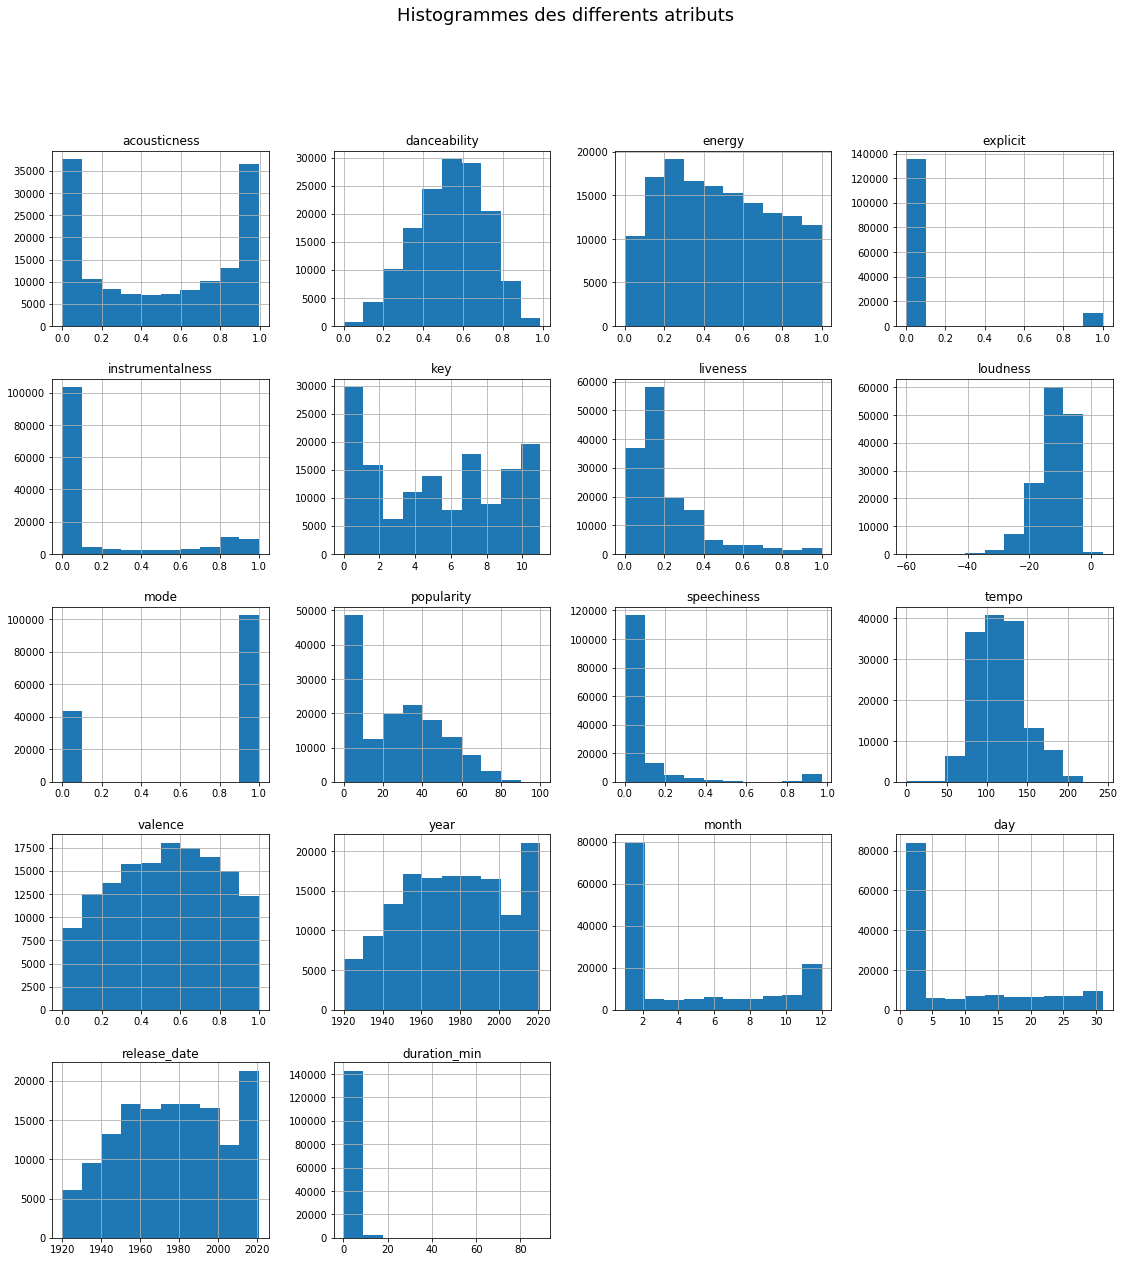

In [21]:
#Grace à subplot, on peut affciher un histogramme pour chaque attribut
fig, ax = plt.subplots(figsize=(19,20))
donnees_musique.hist(ax=ax) 
plt.suptitle("Histogrammes des differents atributs", fontsize=18)               #titre general
plt.show()

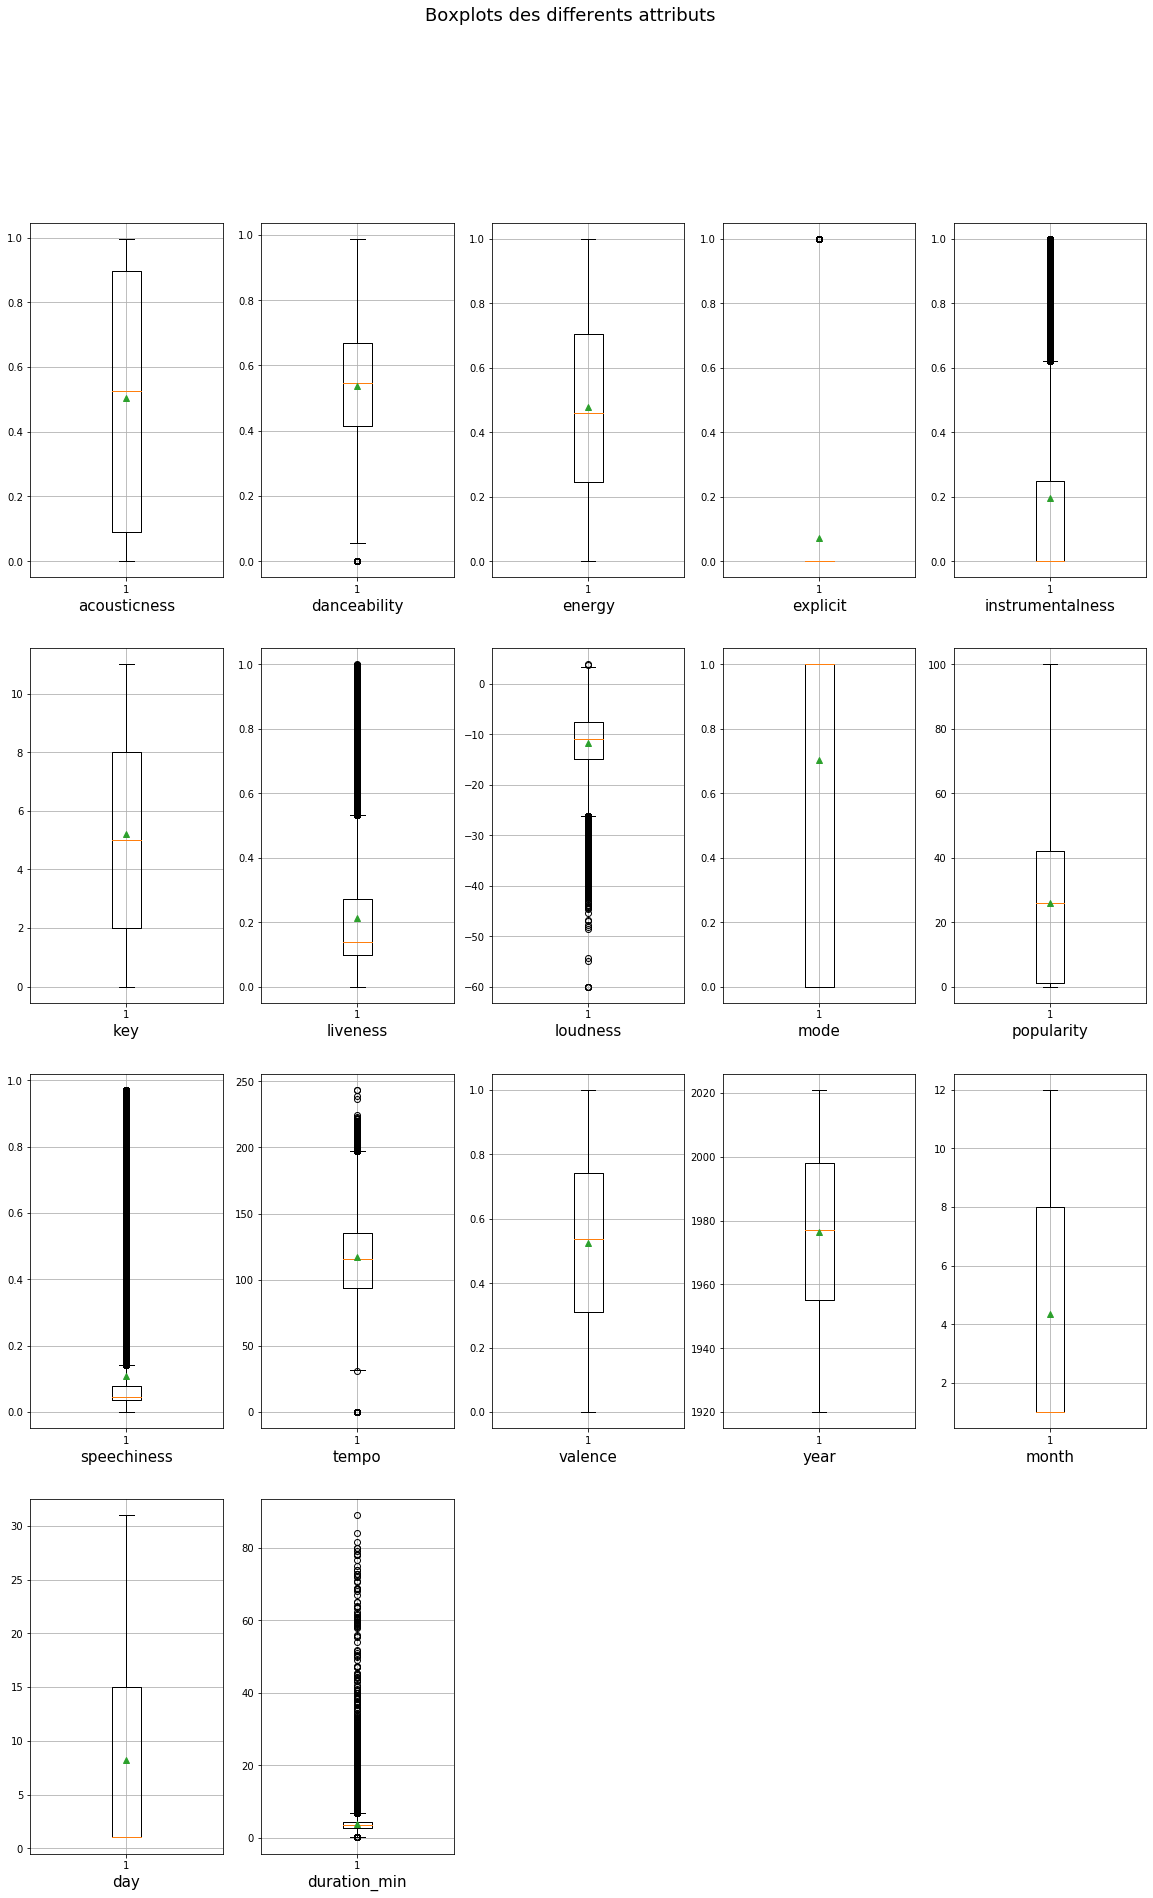

In [22]:
#Je cree un nouvel ensemble de donnees en enlevant les attributs qui sont de type object ou de type Datetime
donnees_musique2=donnees_musique
donnees_musique2=donnees_musique2.loc[:,donnees_musique2.columns!="release_date"]
donnees_musique2=donnees_musique2.select_dtypes(exclude=['object'])

fig = plt.figure(figsize=(20,30))
plt.suptitle("Boxplots des differents attributs", fontsize=18) 
#cette fonction permet d'afficher des boxplots pour chacun des attributs
c = 1                                                           #Compteur de mes plots qui va s'incrementer
for i in donnees_musique2:
    plt.subplot(4, 5, c)
    plt.xlabel(i, size=15)
    plt.boxplot(x = donnees_musique2[i],showmeans=True )        #showmeans me permet d'afficher la moyenne, elle correspondra à la forme triangulaire verte
    c = c + 1 
    plt.grid()

plt.show()

Observation histogrammes et boxplots:  
* **acousticness** : Nous pouvons remarquer qu'ici une majorité des musiques (~70000) se situent à l'extremum de l'acousticness, c'est-à-dire soit ils sont acoustiques soit pas du tout acoustique et moins de 10000 musiques se situent entre deux. De plus, on peut voir que la moyenne a un score d'acousticness de 0,5.

* **danceability** : Plus de la moitié des musiques sont plutot neutre pour danser dessus. En effet on peut remarquer que nous avons un regroupement important vers la valeur 0,5. On peut aussi observer la forme decrivant une valeur aberante par le boxplot au niveau 0.

* **energy** : Grace à son histogramme, on peut remarquer que sur 145961 titres seulement ~ 10000 sont pas energique. Grace au boxplot, on peut voir que nos données sont reparties pour un score d'energy situé entre 0,3 et 0,7 avec une moyenne de 0,5.

* **explicit** : On peut voir que la tendance principale est d'avoir des musiques avec des themes appropriées, non explicite. En effet seulement 10000 titres sont explicites soit 7 %. De plus, avoir un score de 1 est considere aberrant par notre programme.

* **instrumentalness** : On peut pbserver que la tendance principale est de produire des musiques avec des voix. En effet, plus de 100000 titres ont une valeur de 0 pour l'instrumentalness . On peut remarquer que le boxplot qu'on obtient est plutot particulier, en effet on a pas de premiers quartiles et un score superieur à 0,6 est considere comme aberant.

* **key** : On peut remarquer une tendance à utiliser la clé C (~30000 titres), tandis que les clé D, Gb/F# et Ab sont peut utilisés (Moins de 10000 titres pour chacune de ces clés ). La mpoyenne est plutot du coté de l'utilisation de la clé F

* **liveness** : On peut observer que la tendance principale est de produire des musiques sans public. En effet ~70000 titres ont une mesure de la liveness proche de 0. Un score superieur à 0,5 est considere comme eloigne des données. On peut aussi remarquer une asymetrie à droite.

* **loudness** : On peut observer que sur notre ensemble de donnée les musiques possèdent une loudness entre -20 db LUFS et 0 dB LUFS. La moyenne est de -18dB. quelques titres possèdent des scores aberants comme par example un score de -60

* **mode** : On peut voir que la majorité des musiques utilisent le mode majeur, c'est-à-dire ~ 70 % comme le montre bien le troisème quartile.

* **popularity** : Grace à cet histogramme, on peut remarquer que beaucoup n'obtiennent pas le succés qu'elle souhaitaient puisque pas loin de 50000 titres ont un score de popularité proche de 0. La moyenne est de 25 comme score de popularité. On remarque l'existence d'une asymetrie gauche.

* **speechiness** : On peut voir que la tendance principale est d'eviter les mots parlés lors des musiques puisque que plus de 1100000 titres ont un  score de speechiness proche de 0 . De plus avoir un score superieur à 0,15 est considere comme trop eloigne de nos données. Il existe une asymetrie droite.

* **tempo** : On observe ici que nos musiques possèdent un tempo entre 50 à 200 BPM. 125 BPM correspond à la moyenne

* **valence** : On peut voir qu'avec cette attribut les differentes musiques sont presque reparties equitabliquement entre les differentes mesures de la valence avec une predominence d'une mesure 0,5 soit une musique ni positive, ni négative mais plutot neutre.

* **year** / **release_date** : On peut observer que nos données contiennent des musiques sorties entre 1920 à 2020. Une importante partie des titres de nos données sont sorties en 2020.

* **month** / **day** : Pour ces 2 categories, on peut voir que beacuoup de musiques ont été sortie le premier mois ou le premier jour. Cela est du au fait que j'ai assigné la valeur precedemment. On peut aussi remarquer que pllus de 20000 titres sont sorties en decembres. QUand au jour, la repartition apres les premiers jours restent plutot equitable

* **duration_min** : Dans cetee categorie ce qui est importante de remarquer et l'existence de titre qui avoisine les 20 minutes ! Une musique superieur à 5 minutes est considere eloigné des autres valeurs du jeu de données 

Regardons maintenant la corrélation entre nos attributs

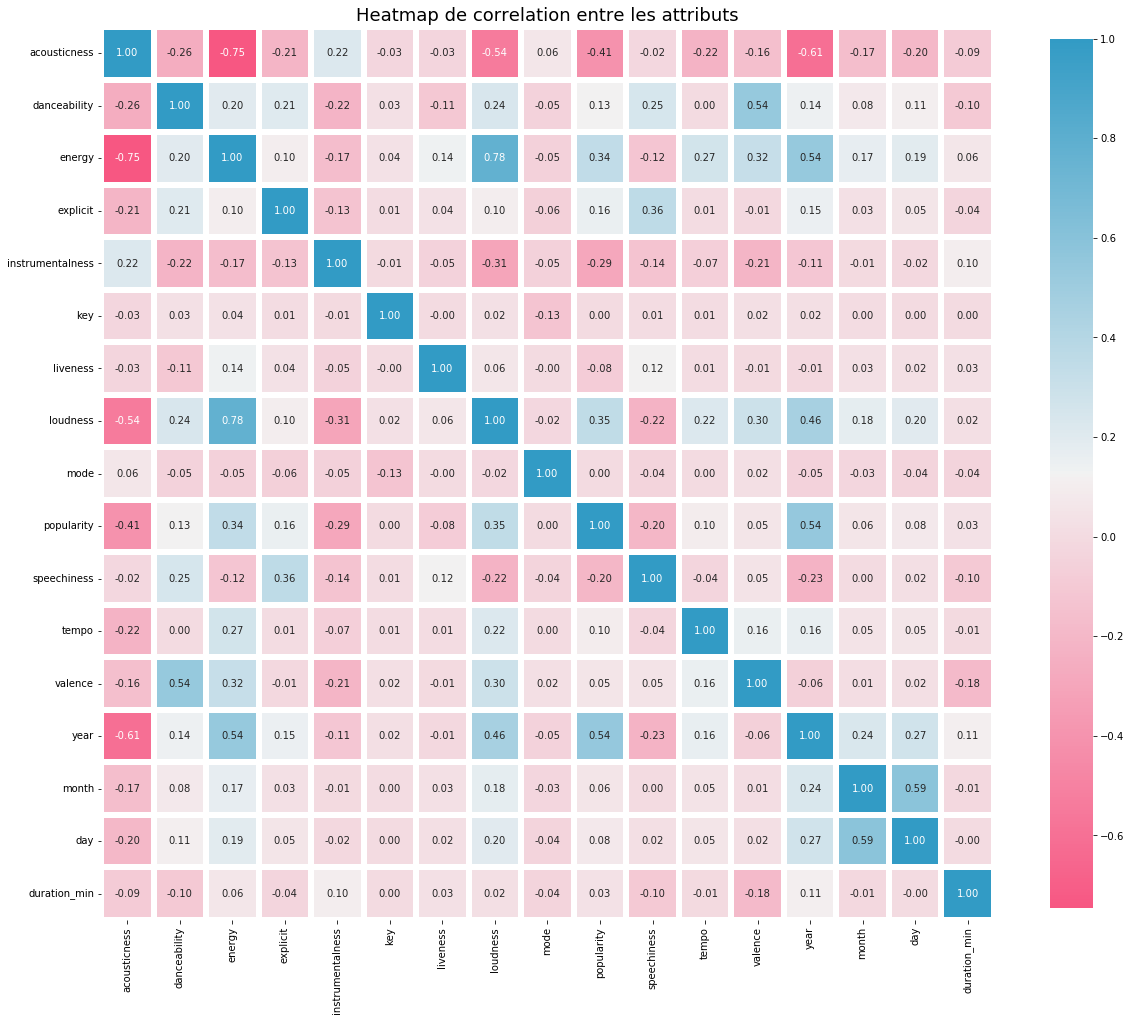

In [24]:
fig, ax = plt.subplots(figsize=(20, 20))

#Creation de la matrice de correlation
donnees_corr=donnees_musique.corr()

# Definition de la couleur de notre figure
couleur= sns.diverging_palette(0, 230, 90, 60, as_cmap=True)

# Affichage de notre figure heatmap
sns.heatmap(donnees_corr, annot=True, fmt=".2f", linewidths=5, cmap=couleur, cbar_kws={"shrink": .8}, square=True)
plt.title("Heatmap de correlation entre les attributs",fontsize=18)
plt.show()

On peut remarquer que certaines cases se repetent à l'identique, appliquons alors un mask pour les enlever de notre heamap.

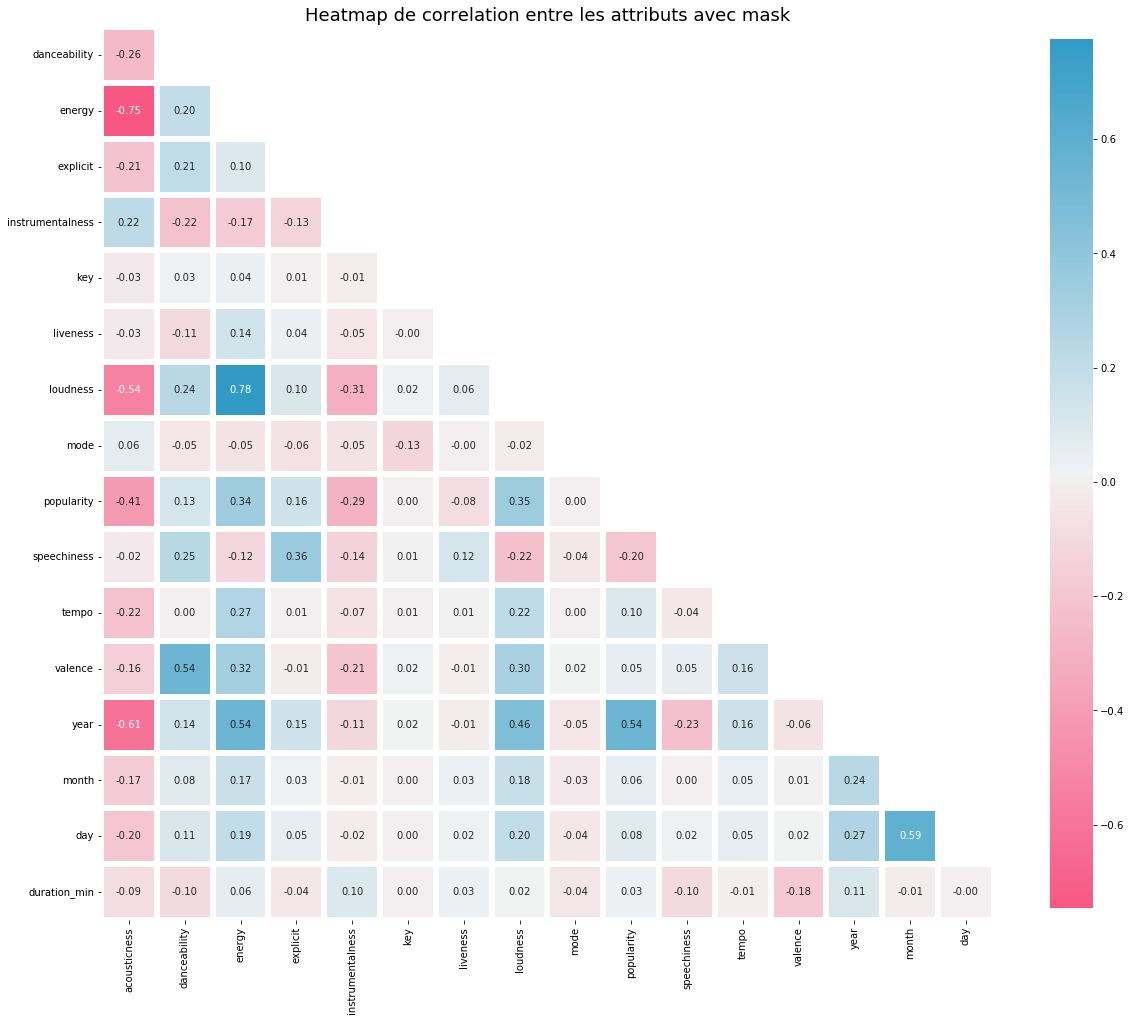

In [25]:
fig, ax = plt.subplots(figsize=(20, 20))

donnees_corr=donnees_musique.corr()

#On definit le mask
mask = np.triu(np.ones_like(donnees_corr, dtype=bool))

# On ajuste nos données pour qu'il n'y y ai pas de cases qui correspond à aucun attribut
mask = mask[1:, :-1]
correlation = donnees_corr.iloc[1:,:-1].copy()

couleur = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)
sns.heatmap(correlation, mask=mask, annot=True, fmt=".2f", linewidths=5, cmap=couleur, cbar_kws={"shrink": .8}, square=True)
plt.title("Heatmap de correlation entre les attributs avec mask",fontsize=18)
plt.show()

Observation :  
Tout d'abord on peut voir que plusieurs attributs ont une correlation de 0 entre eux, c'est-à-dire ils sont independants. C'est le cas des couples **key-liveness**, **key-popularity**, **key-month**, **key-day**, **key-duration_min**, **liveness-mode**, **mode-popularity**, **mode-tempo**, **speechiness-month**, et **day-duration_min**.  
Puis nous avons des attributs fortement corrélés entre eux qui evoluent dans le meme sens (ce qui correspond aux valeurs positives proches de 1). Seul un couple est vraiment proche de 1 avec un score de 0,75 : **energy-loudness**.
Enfin nous avons des attributs fortement corrélés entre eux mais qui evoluent dans le sens contraire( ce qui correspond à des valeurs negatives proche de -1). Dans ce cas 2 couples sortent du lot **acousticness** et fortement corrélés à **year** et **energy** et fortement lier à **acousticness** 

<center>

##### **Analyse temporelle**

Pour pouvoir faire une analyse temporelle, j'ai besoin que ma colonne **release_date** soit prise en index de mon tableau de données :

In [26]:
donnees_musique.set_index(donnees_musique['release_date'],inplace = True)

Je peux maintenant afficher un plot pour chaque attribut. Ce plot prendra alors en abscisse les années ce qui me permetttra ainsi de voir l'évolution de mes attributs au fil du temps

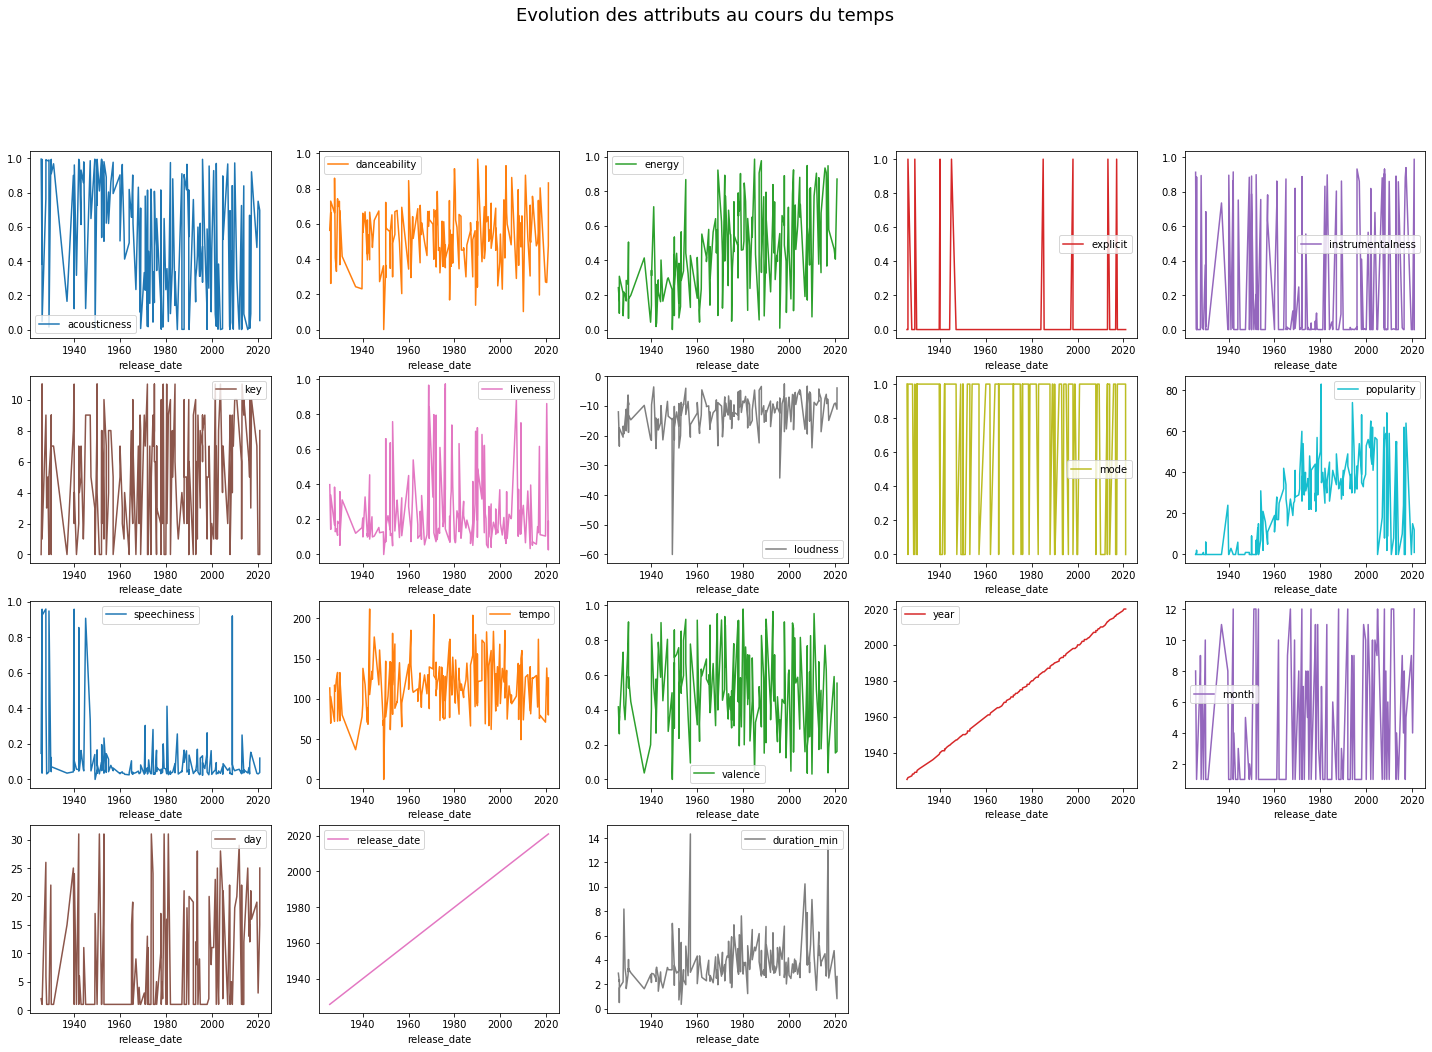

In [27]:
#Pour avoir des graphiques analysables, je vais travailler avec seulement une partie des données. Cela suffit pour avoir une idée generale
donnees_temps =donnees_musique.sample(200) 
#J'affiche mes differentes données
donnees_temps.plot(subplots=True, layout=(5, 5), figsize=(25, 20), sharex=False)
plt.suptitle("Evolution des attributs au cours du temps", fontsize=18) 
plt.show()

Observation :  
* **acousticness** : On peut observer qu'avant les années 40, les musiques etaient plutot acoustiques mais à partir des années 60, on retrouve aussi bien des musiques acoustiques que non acoustiques.

* **danceability** : On peut remarquer 2 principales periodes :  entre 1940 et 2000, il n'y a pas une tendance predominante, cependant à partir des années 2000, les musiques sont de plus en plus faite pour pourvoir danser dessus.

* **energy** : On observe facilement ici une evolution. Au debut du 20ème siècle, les musiques sont peu energiques, au milieu du 20ème siecle une neutralité s'impose, enfin à partir du 21ème siècle, une nouvelle tendance a lieu puisque nos morceaux de musiques sont principalement energiques.

* **explicit** : Ici 3 periodes s'imposent: entre 1920 et 1940, on retrouve des musiques explicites, puis entre 1950 et 1990 plus aucune musiques avec une thematique offensante et à partir des années 1990 le retour de musique explicites. On peut même remarquer que la tendance continue et ne se dissipe pas. Il serait interresant de s'interesser pourquoi pendant une si longue periode aucune musique explicite ne sortaient ( censure ? morceau d'histoire ? ...).

* **instrumentalness** : On peut observer qu'il n'y a pas une tendance principale qui s'impose au fil des années et qu'on a chaque année des musiques aussi bien instrumentales que non instrumentales

* **key** : De même ici, il n y a pas une tendance principale qui s'impose. Toutefois il est interresant de constater qu'a partir des années 2000, les clé 0 et 1 sont peu utilisés

* **liveness** : On observe ici 3 principales periodes : avant 1960 les musiques etaient plutot enregistres en presence d'un public, entre 1960 et 1990 cette tendance diminua grandement, puis à partir des annees 1990 repartie de plus belle mais cependant moins importantes que durant les années precedant 1960.

* **loudness** : On peut observer qu'au fil du temps la loudness diminue (il serait interessant de regarder qu'elle etait l'echelle de la loudness imposé par les gouvernements durants les differentes années)

* **mode** : Il n'y a pas une tendance principale qui s'impose

* **popularity** : Ce graphique est interessant ! Mais cependant on va l'analyser un peu plus tard dans ma partie qui étudie la popularité .

* **speechiness** : On peut observer qu'avant les années 1960, on retrouvait pas mal de mot parlé dans les musiques. Cependant cette tendance se dissipa après et seule quelque musiques utiliserent cette caracteristique (cependant il est interransant de remarquer que nous avons un pic vers 2018)

* **tempo** : Il n'y a pas une tendance principale qui se dessine, le tempo reste à peu pres la meme au cours du temps 

* **valence** : De même ici, il n'y a pas de tendance principale qui se dessinent

* **month**  : On peut observer ici un certain phenomene, en effet durant certaines periodes, les musiques sortaient plutot au debut de mois ! Cependant si on fait une analyse global, la sortie des musiques se fait sur n'importe quel mois

* **day** : On remarque le même phenome que pour l'attribut **month**

* **duration_min** : Il n'y a pas de phenomene principales qui se dessinent, les musiques ont presque toujours eu la même durrée. Cependant l'existence d'un pic en 2018 (encore cette année !) est source d'interrogation et il serait interresant de faire des recherches pour connaitre l'histoire de cette musique.

<center>

##### **La popularité d'une musique ? Analyses et observations**

Dans cette partie, je vais vous montrer mes analyses à l'aide de graphique puis je vais terminer par mes observations sur l'ensemble de mes figures


**Analyse de la popularité d'une musique au cours du temps** *grâce à un plot*

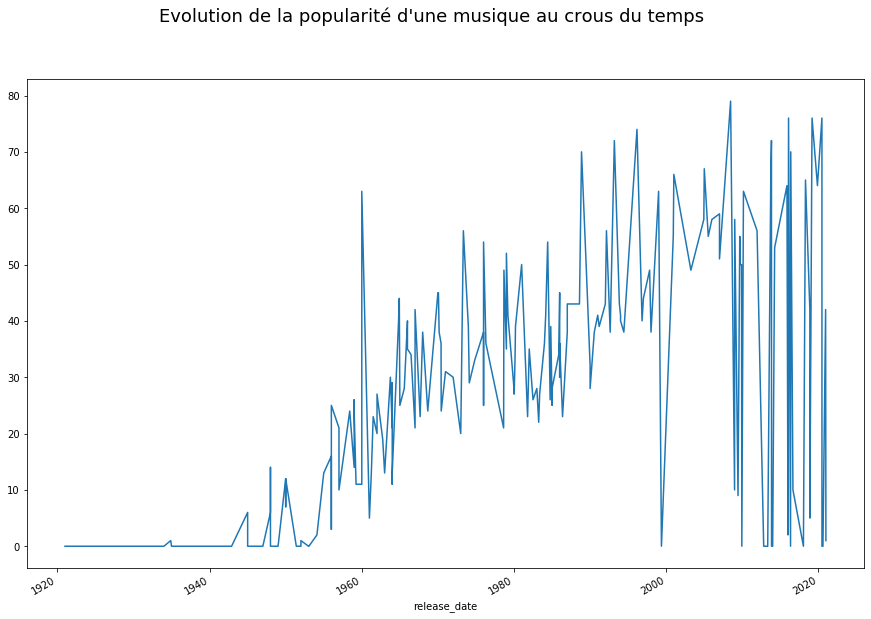

In [28]:
#J'utilise le même procédé qu'à la partie precedente
popularité_temps = donnees_musique['popularity'].sample(200)
popularité_temps.plot(figsize=(15, 10))
plt.suptitle("Evolution de la popularité d'une musique au crous du temps", fontsize=18) 
plt.show()

In [29]:
#J'enleve l'index release_date de mon tableau puisque je n'en aurai plus besoin
donnees_musique=donnees_musique.reset_index(drop=True)

**Quels sont les artistes les plus populaires** ? *grâce à un pie plot*

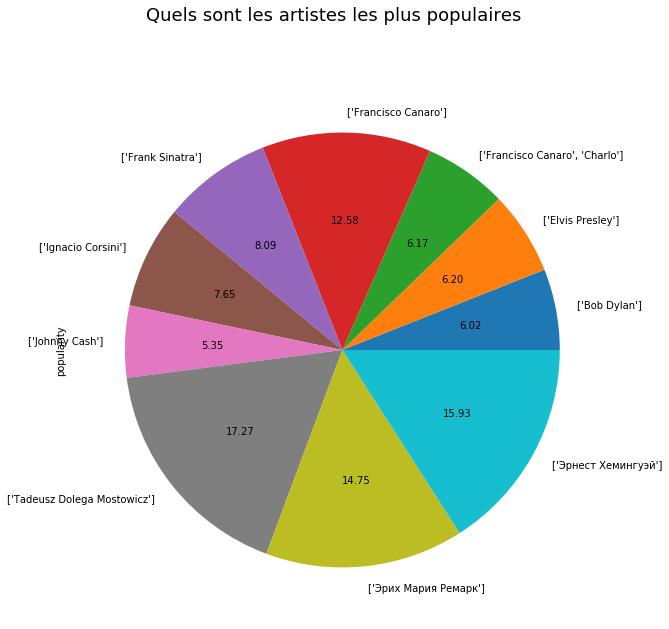

In [30]:
#Je cree un ensemble de donnée ayant seulemnt les attributs qui m'interesse
artiste_pop=pd.DataFrame({ 'artists': donnees_musique['artists'], 'popularity': donnees_musique['popularity'] })
#Je trace ma figure
plt.figure(figsize=(10,10))
plt.suptitle("Quels sont les artistes les plus populaires", fontsize=18) 
fig=artiste_pop.groupby('artists').count()
fig_final=fig.nlargest(10,'popularity')
fig_final.groupby(['artists'])['popularity'].mean().plot(kind='pie', autopct="%.2f",)

**Heatmap de correlation entre la popularité et les autres attributs**

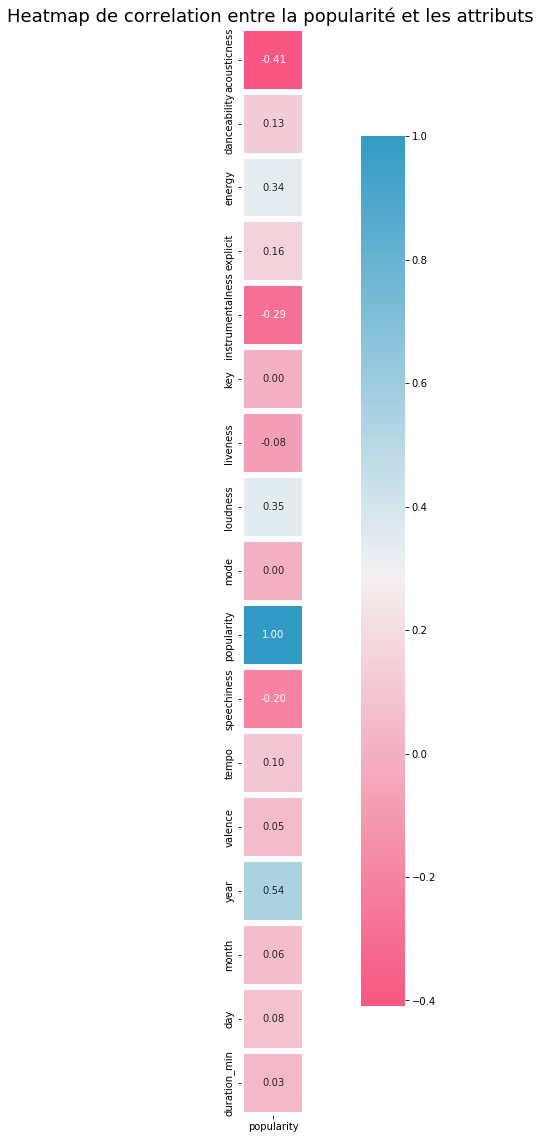

In [31]:
fig, ax = plt.subplots(figsize=(20, 20))

#Creation de la matrice de correlation
donnees_corr=donnees_musique.corr()

# Definition de la couleur de notre figure
couleur= sns.diverging_palette(0, 230, 90, 60, as_cmap=True)

# Affichage de notre figure heatmap
sns.heatmap(donnees_corr[['popularity']], annot=True, fmt=".2f", linewidths=5, cmap=couleur, cbar_kws={"shrink": .8}, square=True)
plt.title("Heatmap de correlation entre la popularité et les attributs ",fontsize=18)
plt.show()

**Autre representation de correlation entre la popularité et les autres attributs : les nuages de points** *grâce à un scatter plot*

In [32]:
fig = plt.figure(figsize=(20,30))
plt.suptitle("Scatter plot : correlation entre popularité et attributs", fontsize=18) 
c = 1
for i in donnees_musique2:
    plt.subplot(4, 5, c)
    plt.xlabel(i, size=15)
    sns.scatterplot(data = donnees_musique2, x =i, y= 'popularity' , hue = 'popularity')
    c = c + 1   
    plt.grid()
plt.show()

**Pairplot**

In [33]:
print("   Pairplort des attributs en prenant en compte la popularité \n")
plt.rcParams['figure.figsize']=(100,100)
sns.pairplot(donnees_musique.sample(1000), hue='popularity')
plt.show()

**PairGrid**

In [34]:
print("   PairGrid des données en prenant en compte la popularité \n")
plt.rcParams['figure.figsize']=(100,100)
pg= sns.PairGrid(donnees_musique.sample(1000), hue='popularity')
pg.map(plt.scatter, alpha=0.8)
pg.add_legend()

On peut tirer plusieurs conclusions grace à ces differentes analyses :  
Tout d'abord, on peut remarquer qu'avant les années 50, la musique etaient peu populaire. &nbsp; Cependant à partir des années 1950, un nouvel engouement se créee, probablement avec la mise en place de nouveau genre musicaux ou la naissance d'artiste populaire puisqu'on peut voir un score de popularité qui s'accentue. &nbsp; Cet engouement se calme et se diminue apres les années 80. De nos jours, on retrouve  à la fois des musiques populaires et peut populaires.  
D'apres notre jeu de données, les 10 artistes les plus populaires sont Tadeusz Dolega Mostowicz, Эрнест Хемингуэй, Эрих Мария Ремарк, Francisco Canaro, Frank Sinatra, Igancio Corsini, Elvis Presley, Charlo, Bob Dylan, Johny Cash. On peut donc voir que la musique est populaire mondialement puisque on retrouve des artistes dans ce top venant de differents pays.  
Passons maintenant aux liens qui peuvent exister entre la popularité et les differents attributs. &nbsp; **key** et **mode** sont 2 attributs independants  à la popularité. &nbsp; On peut donc conclure que le choix de lca clé et du mode d'une musique n'a pas d'impact dans sa popularité. L'**acousticness** et l'**année de sortie d'une musique** sont fortement liées à la popularité. Ainsi il est interressant pour un artiste de s'interresser à ces categories. &nbsp; Ces données se confirment dans nos nuages de point notamment pour l'attribut **year**.  
Pour nos derniere figure, les données qu'on peut en recolter sont à peu pres semblables à ceux qu'on a vu depuis le départ sauf que cette fois-ci on a une vue plus generale qui prend en compte la correlation avec notre attribut **popularity**

<p>

<center>

#### 2) &nbsp; Analyse de mon artiste préféré

<center>

Pour cette partie, j'ai choisi le groupe **Twenty One Pilots**.

Tout d'abord regardons combien de musique appartenant à cette artiste sont presentes dans notre jeu de données.

In [35]:
#On stocke dans une variable le nom de l'artiste qu'on souahaite trouver
variable_a_trouver=donnees_musique['artists']=="['Twenty One Pilots']"

#On filtre notre tableau pour qu'on possède maintenant seulemnt les données relatives à mon artiste
donnees_artiste = donnees_musique[variable_a_trouver]

print("Le nombre de musique totale de cet artiste est : " , len(donnees_artiste) )

Le nombre de musique totale de cet artiste est :  43


Affichons maintenant sous forme de liste les differents titres produit par mon artiste

In [36]:
print(donnees_artiste.name.tolist())


['Car Radio', 'Stressed Out', 'Ride', 'Heathens', 'House of Gold', 'Migraine', 'Holding on to You', 'Tear in My Heart', 'Oh Ms Believer', 'Fall Away', 'Guns for Hands', 'Ode to Sleep', 'Trees', 'Heavydirtysoul', 'Doubt', 'Johnny Boy', 'Addict With A Pen', 'The Run and Go', 'Fake You Out', 'Screen', 'Truce', 'Hometown', 'Lane Boy', 'Friend, Please', 'Semi-Automatic', 'Message Man', 'Polarize', 'Fairly Local', 'Goner', 'Taxi Cab', 'Isle Of Flightless Birds', 'A Car, A Torch, A Death', 'The Pantaloon', 'Trapdoor', 'Not Today', 'Level of Concern', 'March To The Sea', 'Implicit Demand For Proof', 'Air Catcher', 'Before You Start Your Day', 'Jumpsuit', 'Nico and the Niners', 'The Hype']


<p>

Regardons maintenant la popularité de mon artiste au cours du temps

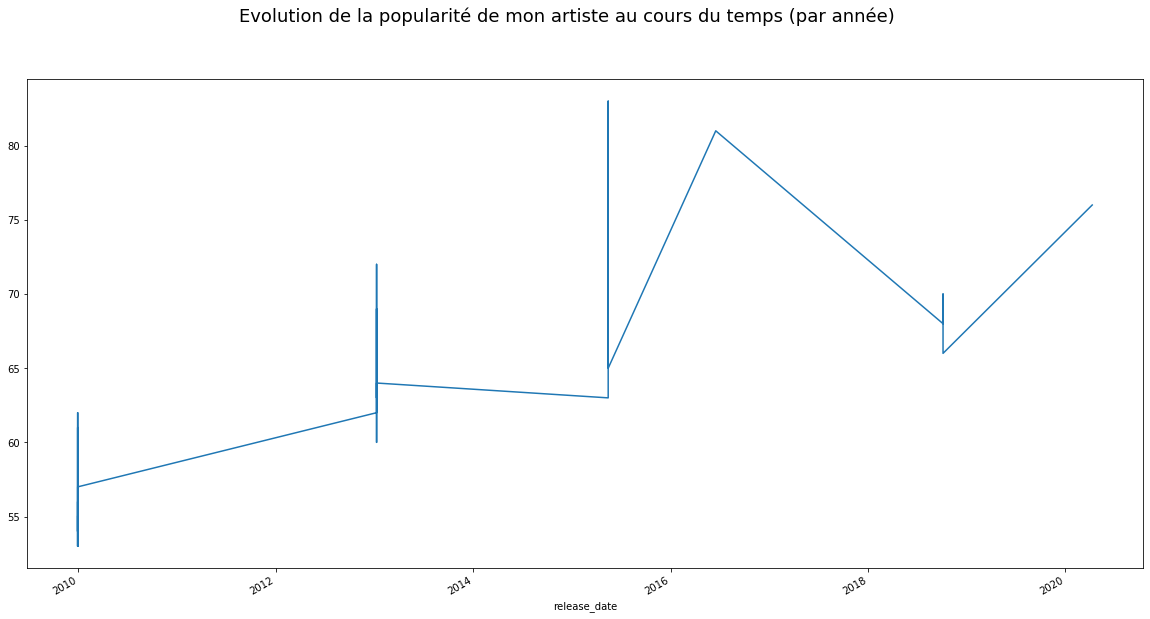

In [37]:
#Comme dans la partie precedente, j'utilise la même methode
#Je place release_date en index de mon tableau de données
donnees_artiste.set_index(donnees_artiste['release_date'],inplace = True)

#Puis j'affiche mon graphique
plt.figure(figsize=(20,10))
donnees_artiste['popularity'].plot()
plt.suptitle("Evolution de la popularité de mon artiste au cours du temps (par année)", fontsize=18) 
plt.show()

#J'enleve ensuite cet index
donnees_artiste=donnees_artiste.reset_index(drop=True)

On peut observer qu'entre 2010 et 2017, la populartié de mon artiste fut croissante avec nottament un pic à un score de plus de 80 vers 2015. Après 2017, sa popularité chuta pour reaugmenter en 2019.  
Cherchons pourquoi en 2015 mon artiste eu un pic. Une des pistes est la création d'une musique qui devient un hit.  
Filtrons notre tableau et examinons. 

In [38]:
donnees_artiste_analyse = donnees_artiste.query("popularity >= 80")
donnees_artiste_analyse

,acousticness,artists,danceability,energy,explicit,id,instrumentalness,key,liveness,loudness,...,name,popularity,speechiness,tempo,valence,year,month,day,release_date,duration_min
1,0.04620,['Twenty One Pilots'],0.734,0.637,0,3CRDbSIZ4r5MsZ0YwxuEkn,0.000023,4,0.0602,-5.677,...,Stressed Out,83,0.1410,169.977,0.648,2015,5,15,2015-05-15,3.372217
2,0.00835,['Twenty One Pilots'],0.645,0.713,0,2Z8WuEywRWYTKe1NybPQEW,0.000000,6,0.1130,-5.355,...,Ride,80,0.0393,74.989,0.566,2015,5,15,2015-05-15,3.575117
3,0.08410,['Twenty One Pilots'],0.732,0.396,0,6i0V12jOa3mr6uu4WYhUBr,0.000036,4,0.1050,-9.348,...,Heathens,81,0.0286,90.024,0.548,2016,6,16,2016-06-16,3.265333


On observe qu'en 2015, 2 musiques ont atteint un score de popularité superieur à 80. De plus, si on tape le nom de ces musiques sur internet, nous pouvons voir que le nombre de vue sur youtube depasse le milliard. Ceci explique donc le pic dans notre graphe precedant.

<p>

Analysons maintenant ces differents attributs

/tmp/ipykernel_4121/2255614409.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  donnees_artiste.hist(ax=ax)


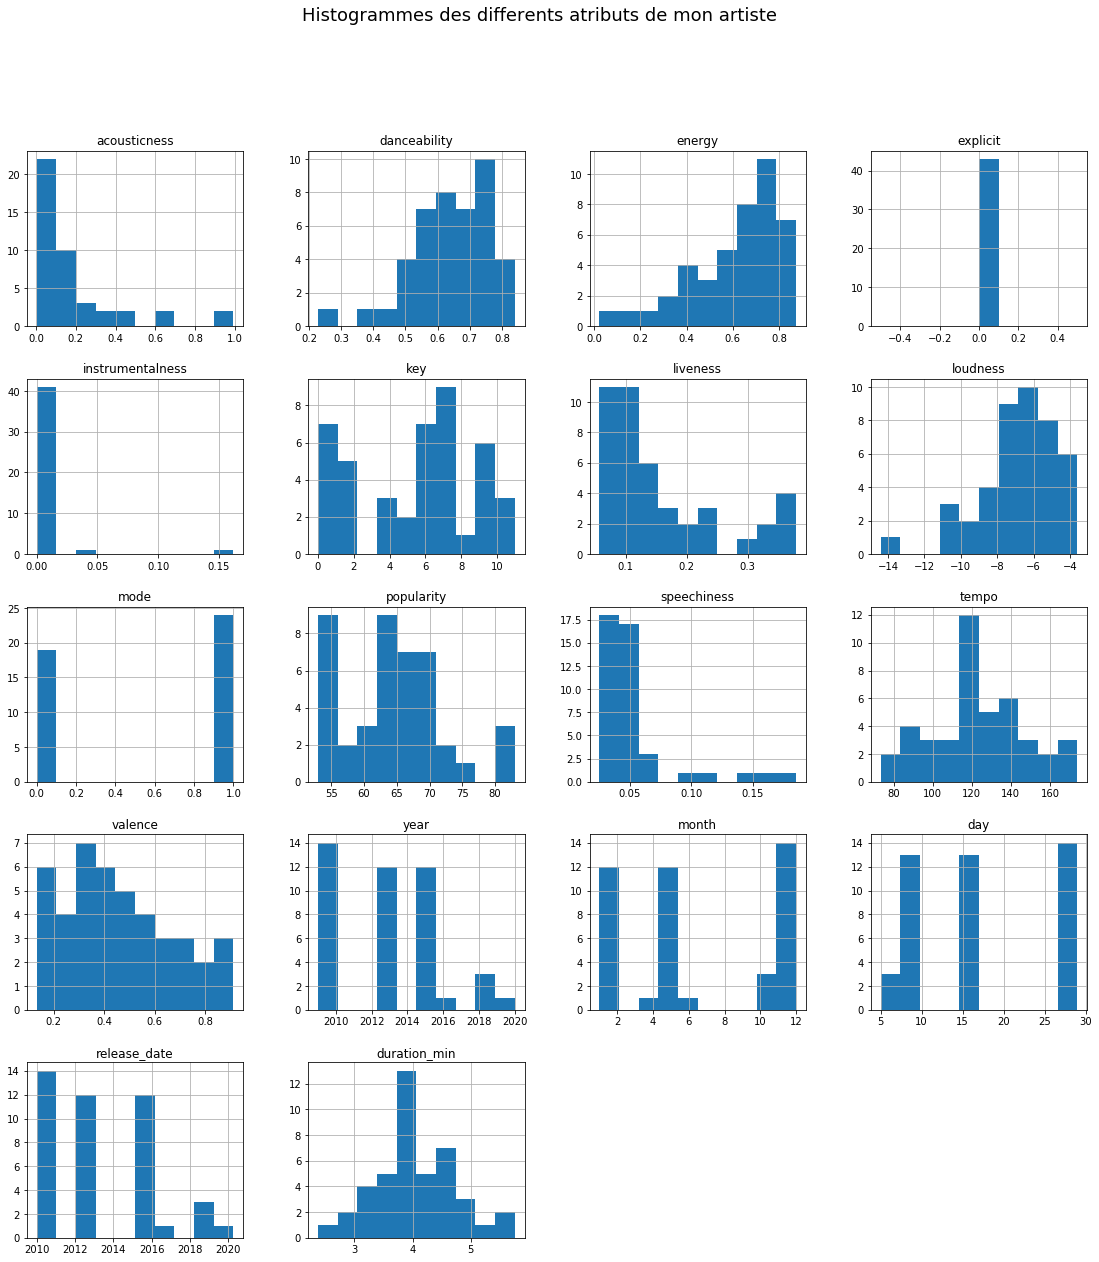

In [39]:
#Tracons des histogrammes pour chacune de ces atributs
fig, ax = plt.subplots(figsize=(19,20))
donnees_artiste.hist(ax=ax) 
plt.suptitle("Histogrammes des differents atributs de mon artiste", fontsize=18)            
plt.show()

Observation :  
* **acousticness** : Notre artiste produit plutot des musiques peu acoustiques. En effet il produit plutot de la musique pop-rock ce qui explique l'utilisation d'instruments plutot electriques.

* **danceability** : Leurs morceaux sont propices à la danse.

* **energy** : Les musiques sont energetique ce qui est en accord avec leur style rock .

* **explicit** :On retrouve peu voir aucun son explicite. Ceci s'explique probablement par le fait de "plaire à tous et ne pas choquer afin de conquerir le plus de monde possible"

* **instrumentalness** : Peu de leur musique sont instrumentales. Ce qui est donc en accord avec les attributs precedants

* **key** : Notre artiste utilise environ toutes les clés sauf la clé Eb, apre des recherches ceci peut s'expliquer par le fait que cette clé correspond à la touche noir d'un piano, donc touche non utilisé par mon artiste.

* **liveness** : On peut observer que la plupart des musiques ont été enregistrés sans presence d'un publique/

* **loudness** : On peut observer que la loudness de leur musique se situent bien dans les normes puisqu'ils ont une loundess qui vaire entre -14 et -4 db LUDS/

* **mode** / **valence**: On peut voir qu'ici la repartition entre les 2 modes et egales ce qui est en accord aussi avec la valence puisqu'on a a la fois des sons positives ( l'artiste va alors utiliser un mode majeur ) et des sons tristes (l'artiste va alors utiliser le mode mineur)

* **speechiness** : On peut observer que peu voir aucune des musiques contiennetndes mots parlés. Ceci s'explique par le fait que mon groupe produisent des musiques à une epoque où parler sans chanter dans des musiques et peut utilisé dans le domaine pop-rock

* **tempo** : On a une tempo plutot repartie entre 80 et 140 BPM ce qui est plutot bruyant mais en accord avec leur style de musique

* **month**  : On peut observer ici que mon groupe sortait leur morceau soit en Janvier, soit entre avril et juin, soit en octobre et decembre. On pourrai penser que la periode d'avril et juin correspondrait à des musiques joyeuses et la periode octobre à decembre periode hivernale correspondrait à leurs musiques tristes

* **day** : On remarque que mon artiste sortait ses lusiques soit au debut de moi, soit pile  à la moitié du mois, soit à la fin d'unmois

* **duration_min** : La durée de leur musique varient 1 à 5 minutes, ce qui est en accord avec ce qu'on peut voir à leur epoque dans leur style musicales

Regardons maintenant l'évolution de mon artiste au cours du temps

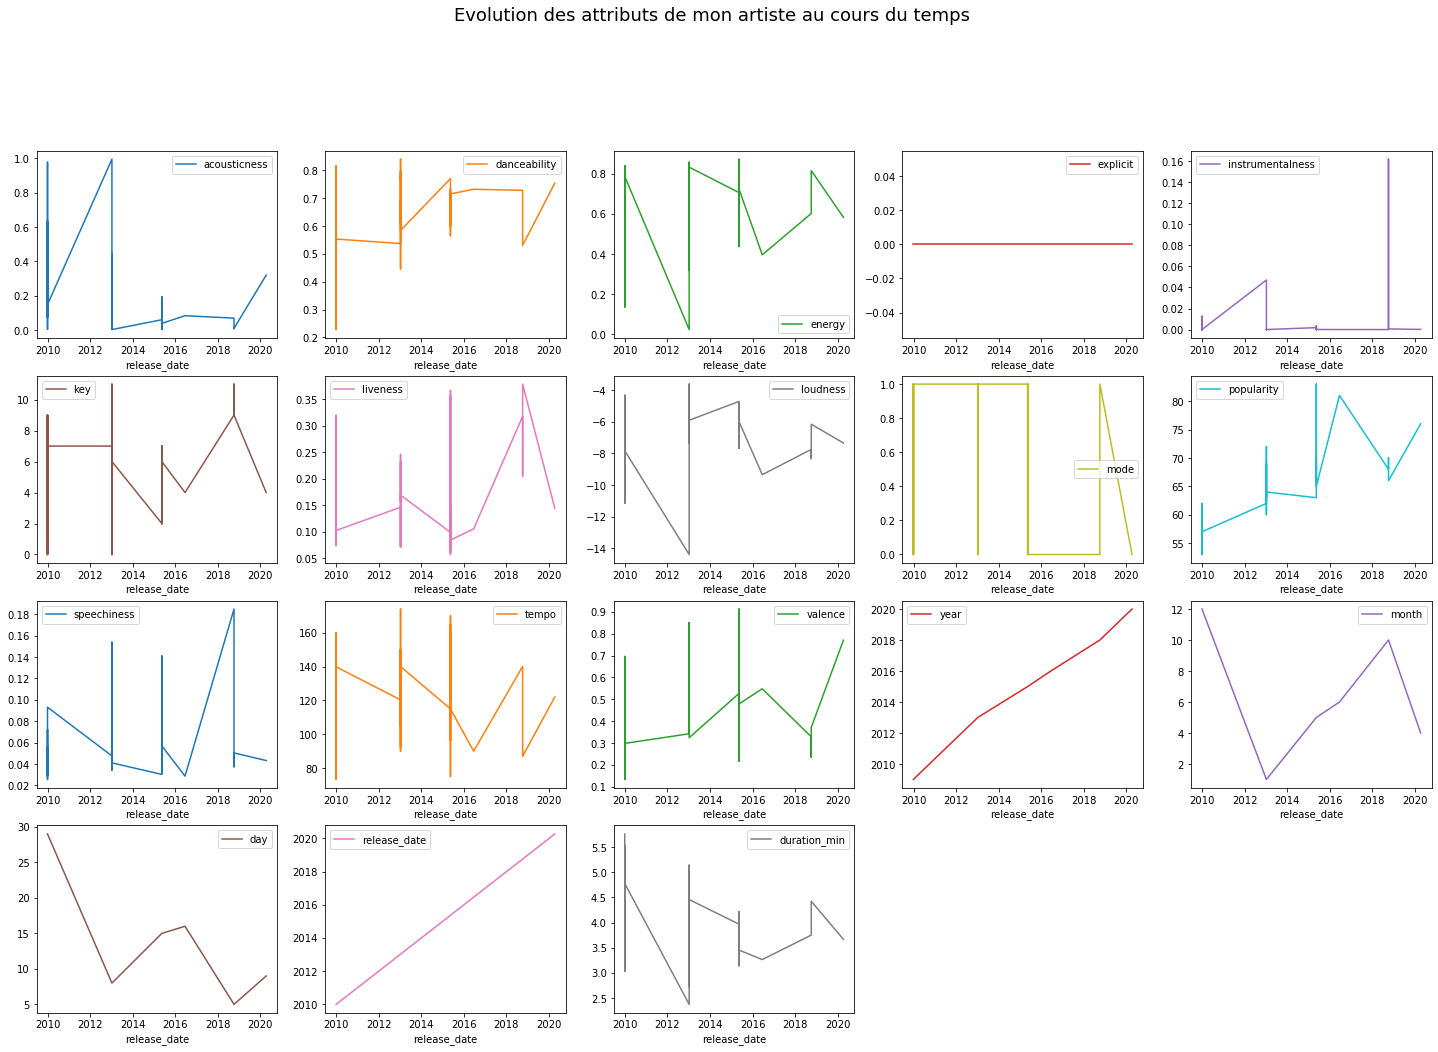

In [40]:
#J'utilise toujours la même methode 
donnees_artiste.set_index(donnees_artiste['release_date'],inplace = True)

donnees_artiste.plot(subplots=True, layout=(5, 5), figsize=(25, 20), sharex=False)
plt.suptitle("Evolution des attributs de mon artiste au cours du temps", fontsize=18) 

donnees_artiste=donnees_artiste.reset_index(drop=True)
plt.show()

On peut observer qu'au fil du temps, mon artiste evolua stylistiquement, detaillons cette evolution

Observation :  
* **acousticness** : Mon artiste est passée à un style plutot non acoustique au fil du temps. Cependant ces dernieres annnées on peut voir une petite augmentation qui nous monntre que notre artiste se reinterresse au style acoustique.

* **danceability** : On peut observer que l'evolution ici se fait par la production de musique de plus en plus propice à la danse. 

* **energy** : On observe que les musiques deviennent au fil du temps de plus en plus energiques et on retrouve cette caracteristique facilement dans leur musique actuelle.

* **explicit** : Il y a eu aucune evolution pour cet atribut !

* **instrumentalness** : On peut observer que la tendance princpale de mon artiste est de produire des musiques non instrumentales .

* **key** : On peut observer que mon groupe aborda les differents clés au cours du temps sans qu'une tendance apparaisse.

* **liveness** : On observe ici qu'il peut arriver que des musiques soit faite devant un public. Cependant de nos jours cette tendance à k'air de diminuer.

* **loudness** : On peut observer qu'au fil du temps la loudness reste aux alentours de -7 dB .

* **mode** : On observe ici que l'utilisation du mode mineur et du mode majeur se fait plutot par intervalle de temps. En effet avant 2016, mon groupe priviligie l'utilisation du mode mineur mais apres 2016, il priviligie plutot le mode majeur.

* **tempo** : On observe ici qu'au fil du temps le tempo de leur musique se centre vers les 120 BPM.

* **valence** : On peut remarquer ici que la tendance actuel de mon groupe est de produire des musiques plutot positives.

* **duration_min** : On remarque ici une volonté de mon groupe d'avoir de plus en plus de musiques  qui  durent vers les 4 minutes.

Regardons maintenant les differences stylistiques entre la musique la plus populaire et la moins populaires de mon artiste.

In [41]:
#Je cherche le score maximum de popularité qu'a atteint mon artiste
max= donnees_artiste["popularity"].max()
print (max)

83


/tmp/ipykernel_4121/3584142725.py:6: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  donnees_artiste_analyse.hist(ax=ax)


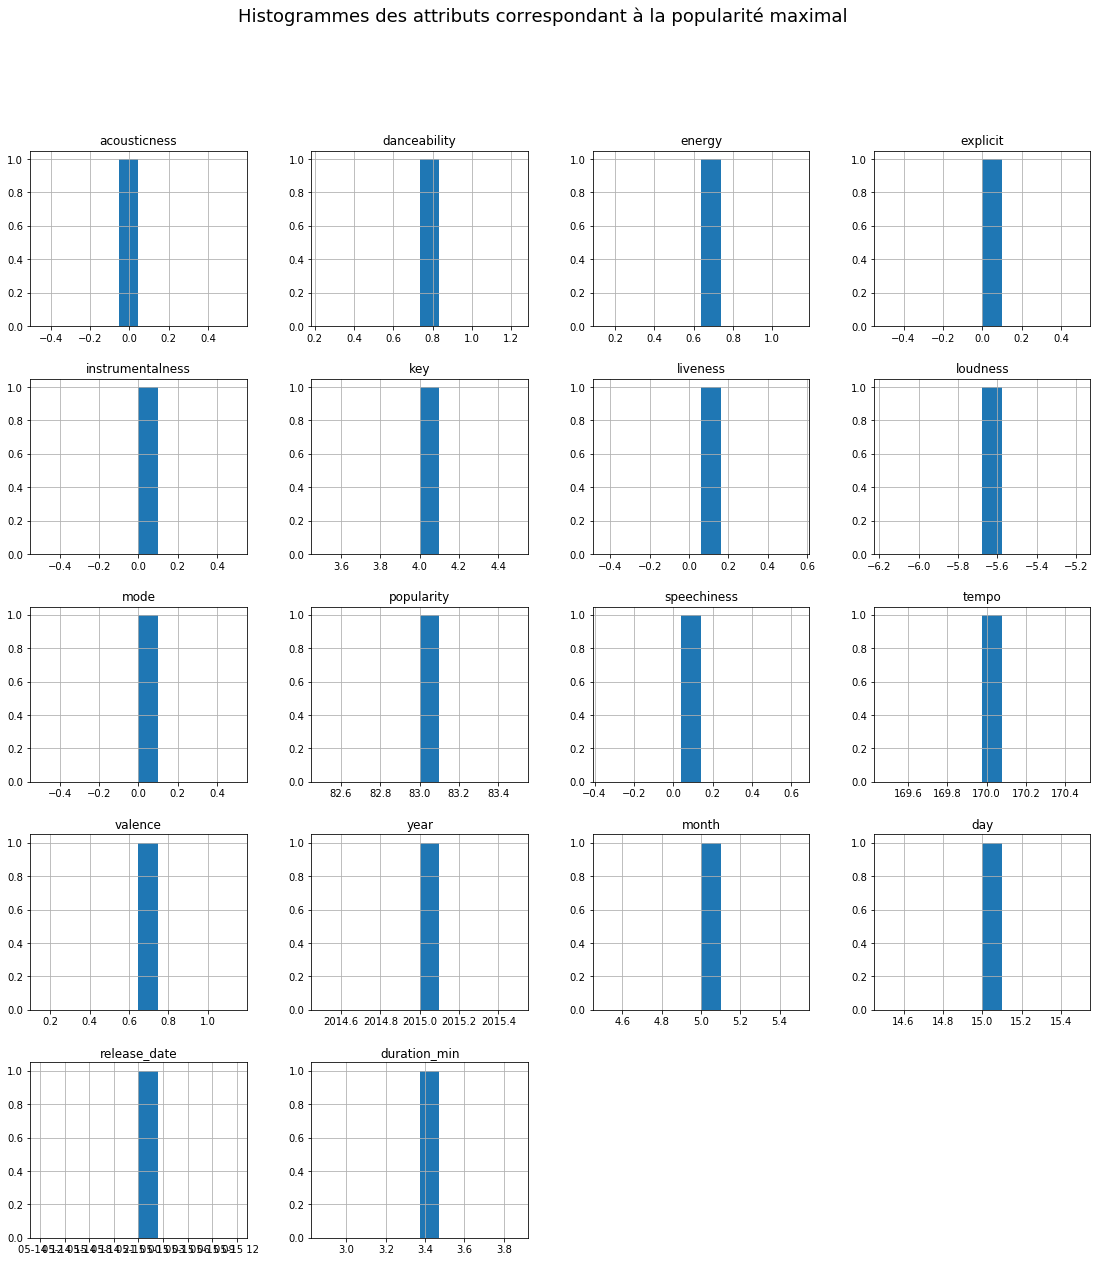

In [42]:
#Je filtre mes données
donnees_artiste_analyse = donnees_artiste.query("popularity >= 83")

#J'affiches mes graphiques
fig, ax = plt.subplots(figsize=(19,20))
donnees_artiste_analyse.hist(ax=ax) 
plt.suptitle("Histogrammes des attributs correspondant à la popularité maximal", fontsize=18)            
plt.show()

In [43]:
#Je cherche le score minimum de popularité qu'a atteint mon artiste
min= donnees_artiste["popularity"].min()
print (min)
donnees_artiste_analyse = donnees_artiste.query("popularity <= 53")
donnees_artiste_analyse


53


,acousticness,artists,danceability,energy,explicit,id,instrumentalness,key,liveness,loudness,...,name,popularity,speechiness,tempo,valence,year,month,day,release_date,duration_min
36,0.4730,['Twenty One Pilots'],0.693,0.496,0,08ZuYMwYKdxLrGufv125m0,0.000011,7,0.0738,-10.146,...,March To The Sea,53,0.0444,124.959,0.149,2009,12,29,2009-12-29,5.529333
38,0.0731,['Twenty One Pilots'],0.519,0.436,0,70oK6ePjILgOuBUzRDOfCR,0.000000,8,0.1070,-8.064,...,Air Catcher,53,0.0285,109.962,0.133,2009,12,29,2009-12-29,4.233333
39,0.9760,['Twenty One Pilots'],0.363,0.135,0,4izhmF4sQgGemZpLC68bC5,0.000265,7,0.1070,-11.166,...,Before You Start Your Day,53,0.0295,98.450,0.195,2009,12,29,2009-12-29,3.883333


3 musiques ont la popularité la plus faible. Pour simplifier mon analyse, je decide d'en garder qu'un seul. Pour faire mon choix, je pars voir le nombre de vue sur youtube et je prends la plus faible. *Before You Start Your Day* est l'oeuvre la moins écoutée, travaillons alors sur cet oeuvre

In [44]:
donnees_artiste_analyse = donnees_artiste_analyse.query("tempo <= 100")
donnees_artiste_analyse


,acousticness,artists,danceability,energy,explicit,id,instrumentalness,key,liveness,loudness,...,name,popularity,speechiness,tempo,valence,year,month,day,release_date,duration_min
39,0.976,['Twenty One Pilots'],0.363,0.135,0,4izhmF4sQgGemZpLC68bC5,0.000265,7,0.107,-11.166,...,Before You Start Your Day,53,0.0295,98.45,0.195,2009,12,29,2009-12-29,3.883333


/tmp/ipykernel_4121/808712110.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  donnees_artiste_analyse.hist(ax=ax)


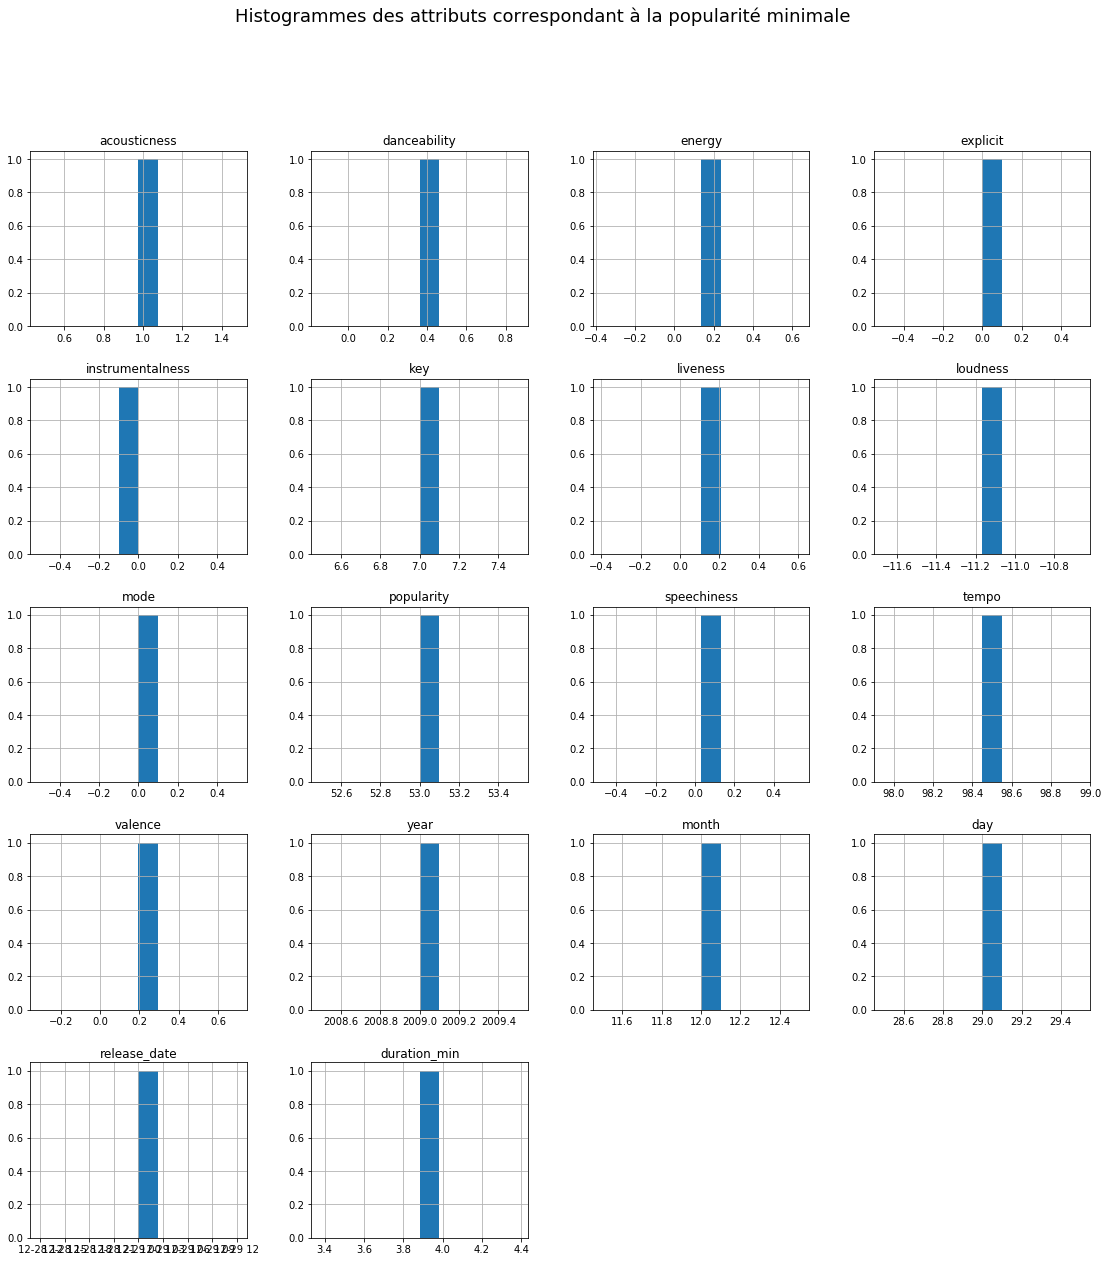

In [45]:
fig, ax = plt.subplots(figsize=(19,20))
donnees_artiste_analyse.hist(ax=ax) 
plt.suptitle("Histogrammes des attributs correspondant à la popularité minimale", fontsize=18)            
plt.show()

On observe qu'entre la musique populaire et peu populaire plusieurs differences ont lieu. Voici donc ma recette magique pour produire une musique qui aura du succés deduie directement de mes 2 analyses precedantes:  
* Priviligiez la production d'une musique non acoustique.
* Produisez une musique faite pour danser.
* Votre musique doit être energique !!!
* Utilisez plutot la clé E lors de la créatiion de votre son .
* Essayez d'avoir une loudness pas trop loin de 0.
* Il faut que votre musique ai un tempo plutot voir vraiment rapide !
* Produisez une musique qui renvoit de la positivité et de la bonne humeur.
* Priviligiez une musique qui dure aux alentours de 3 minutes.

___

<center>



### **Partie 3 : Mise en place d’un modèle de Machine Learning**  <a class="anchor" id="Partie3"></a>

In [46]:
donnees_musique.head()

,acousticness,artists,danceability,energy,explicit,id,instrumentalness,key,liveness,loudness,...,name,popularity,speechiness,tempo,valence,year,month,day,release_date,duration_min
0,0.991000,['Mamie Smith'],0.598,0.224,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,-12.628,...,Keep A Song In Your Soul,12,0.0936,149.976,0.6340,1920,1,1,1920-01-01,2.805550
1,0.643000,"[""Screamin' Jay Hawkins""]",0.852,0.517,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,-7.261,...,I Put A Spell On You,7,0.0534,86.889,0.9500,1920,1,5,1920-01-05,2.503333
2,0.993000,['Mamie Smith'],0.647,0.186,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,-12.098,...,Golfing Papa,4,0.1740,97.600,0.6890,1920,1,1,1920-01-01,2.730450
3,0.000173,['Oscar Velazquez'],0.730,0.798,0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2,0.1280,-7.311,...,True House Music - Xavier Santos & Carlos Gomi...,17,0.0425,127.997,0.0422,1920,1,1,1920-01-01,7.034783
4,0.295000,['Mixe'],0.704,0.707,1,2hJjbsLCytGsnAHfdsLejp,0.000246,10,0.4020,-6.036,...,Xuniverxe,2,0.0768,122.076,0.2990,1920,10,1,1920-10-01,2.753733


In [47]:
donnees_musique.tail()

,acousticness,artists,danceability,energy,explicit,id,instrumentalness,key,liveness,loudness,...,name,popularity,speechiness,tempo,valence,year,month,day,release_date,duration_min
145956,0.9880,"['Ludovico Einaudi', 'Johannes Bornlöf']",0.316,0.0573,0,6QGVWUbmlePAiY5zJjfCmT,0.879000,3,0.120,-24.121,...,Night,0,0.0515,81.070,0.0373,2021,1,23,2021-01-23,5.055550
145957,0.0156,"['Elyamont', 'Cristina Soto']",0.708,0.8490,0,54NeJ65oDIydq9jr0b8qjg,0.000000,0,0.146,-2.579,...,Signals - Radio Edit,0,0.0457,123.052,0.4520,2020,12,25,2020-12-25,3.189017
145958,0.7950,['Alessia Cara'],0.429,0.2110,0,3N3Wi5Un7iT8amLezSRwub,0.000000,4,0.196,-11.665,...,A Little More,0,0.0360,94.710,0.2280,2021,1,22,2021-01-22,2.412000
145959,0.0484,"['Stephan F', 'YA-YA']",0.693,0.8260,0,1Cbf6PLWsL4s51eFepXx6L,0.000012,1,0.231,-2.669,...,Only Tonight - Radio Edit,0,0.0762,126.049,0.3610,2020,12,25,2020-12-25,2.952467
145960,0.8060,['Roger Fly'],0.671,0.5890,0,48Qj61hOdYmUCFJbpQ29Ob,0.920000,4,0.113,-12.393,...,Together,0,0.0282,108.058,0.7140,2020,12,9,2020-12-09,3.635783


In [48]:
donnees_musique.columns.tolist()

['acousticness',
 'artists',
 'danceability',
 'energy',
 'explicit',
 'id',
 'instrumentalness',
 'key',
 'liveness',
 'loudness',
 'mode',
 'name',
 'popularity',
 'speechiness',
 'tempo',
 'valence',
 'year',
 'month',
 'day',
 'release_date',
 'duration_min']

Pourle modèle, je décide de garder les attributs suivant:  
* la **danceability**, en effet cet attribut evolue differement au cours du temps. C'est donc un attribut propice pour mon modèle
* l'**acousticness** tout simplement parce que c'est un attribut fortement lié à la popularité
* la **mode** comme variable categorielle puisque je trouve que cet attribut peut facielement être relier à pas mal d'autres attributs
* **instrumentalness** pusique cela m'interesse de savoir si les musiques instrumentales va continuer à etre peu populaire ou va-il-avoir un changement majeur
* **explicit** ,en effet j'ai pu voir qu'avec mon artiste préfére, qu'avec un score nul la musique produite a du succés, cependant est-ce que ca sera le schéma futur ?

In [49]:

donnees_ml = pd.DataFrame({ 'popularity': donnees_musique['popularity'], 'danceability' : donnees_musique['danceability'], 'acousticness': donnees_musique['acousticness'], 'mode': donnees_musique['mode'], 'instrumentalness': donnees_musique['instrumentalness'],'explicit': donnees_musique['explicit']})
donnees_ml.head()


,popularity,danceability,acousticness,mode,instrumentalness,explicit
0,12,0.598,0.991000,0,0.000522,0
1,7,0.852,0.643000,0,0.026400,0
2,4,0.647,0.993000,1,0.000018,0
3,17,0.730,0.000173,1,0.801000,0
4,2,0.704,0.295000,0,0.000246,1


Implementons et evaluons mon modèle. Pour chaque donnée, je debute par un modèle de Gradient Boosting Regressor puis je fais ensuite un modèle de regression lineaire:    

**Appliquée à l'attribut danceability**

In [50]:
SEED = 1
#J'importe mes données avec les attributs que je souhaite evaluer
X = donnees_ml.danceability
y = donnees_ml.popularity
  
# Je separe mes données de manière aleatoire
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.66, random_state = SEED)
  
# IJe met en place mon modèle Gradient Boosting Regressor
gbr = GradientBoostingRegressor(random_state = SEED)


#Je reorganise mes données afin que mon modèle fonctionne correctment
train_X = np.array(train_X).reshape(-1, 1)
test_X = np.array(test_X).reshape(-1, 1)


# J'entraine mon modèle
gbr.fit(train_X, train_y)
  
# Etape de la prediction 
pred_y = gbr.predict(test_X)

  
# J'evalue mon modele avec la MSE (comme elle est au carré je n'oublie pas de passer à la puissance 1/2
evaluation_modele= MSE(test_y, pred_y) ** (1 / 2)
  
# J'affiche ma MSE
print(' La MSE renvoile la valeur : {:.2f}'.format(evaluation_modele))

 La MSE renvoile la valeur : 21.70


On peut observer que la valeur obtenue est plutot importante !

In [51]:
X = np.array(donnees_ml['danceability']).reshape(-1, 1) 
y = np.array(donnees_ml['popularity']).reshape(-1, 1) 
  
  
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.66, random_state = SEED)
  
regr = LinearRegression() 
  
regr.fit(train_X, train_y) 

pred_y = regr.predict(test_X)

evaluation_modele= MSE(test_y, pred_y) ** (1 / 2)
  
print(' La MSE renvoile la valeur : {:.2f}'.format(evaluation_modele))


 La MSE renvoile la valeur : 21.78


On observe que la MSE obtenu est superieur à celle obtenu avec le modèle Gradient Boosting Regressor.
Le modèle Gradient Boosting Regressor est alors plus précis .

**Appliquée à l'attribut acousticness**

In [52]:
SEED = 1
X = donnees_ml.acousticness
y = donnees_ml.popularity
  
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.66, random_state = SEED)
  
gbr = GradientBoostingRegressor(random_state = SEED)

train_X = np.array(train_X).reshape(-1, 1)
test_X = np.array(test_X).reshape(-1, 1)

gbr.fit(train_X, train_y)
  

pred_y = gbr.predict(test_X)

evaluation_modele= MSE(test_y, pred_y) ** (1 / 2)
  
print(' La MSE renvoile la valeur : {:.2f}'.format(evaluation_modele))

 La MSE renvoile la valeur : 19.31


In [53]:
X = np.array(donnees_ml['acousticness']).reshape(-1, 1) 
y = np.array(donnees_ml['popularity']).reshape(-1, 1) 
  
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.66, random_state = SEED)
  
regr = LinearRegression() 
  
regr.fit(train_X, train_y) 

pred_y = regr.predict(test_X)


evaluation_modele= MSE(test_y, pred_y) ** (1 / 2)
  

print(' La MSE renvoile la valeur : {:.2f}'.format(evaluation_modele))

 La MSE renvoile la valeur : 20.02


**Appliquée à l'attribut mode**

In [73]:
SEED = 1
X = np.array(donnees_ml['mode']).reshape(-1, 1) 
y = donnees_ml.popularity
  
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.66, random_state = SEED)
  
gbr = GradientBoostingRegressor(random_state = SEED)

gbr.fit(train_X, train_y)
  

pred_y = gbr.predict(test_X)

evaluation_modele= MSE(test_y, pred_y) ** (1 / 2)
  
print(' La MSE renvoile la valeur : {:.2f}'.format(evaluation_modele))

 La MSE renvoile la valeur : 21.96


In [74]:
X = np.array(donnees_ml['mode']).reshape(-1, 1) 
y = np.array(donnees_ml['popularity']).reshape(-1, 1) 
  
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.66, random_state = SEED)
  
regr = LinearRegression() 
  
regr.fit(train_X, train_y) 

pred_y = regr.predict(test_X)


evaluation_modele= MSE(test_y, pred_y) ** (1 / 2)
  

print(' La MSE renvoile la valeur : {:.2f}'.format(evaluation_modele))

 La MSE renvoile la valeur : 21.96


**Appliquée à l'attribut instrumentalness**

In [54]:
SEED = 1
X = donnees_ml.instrumentalness
y = donnees_ml.popularity
  
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.66, random_state = SEED)
  
gbr = GradientBoostingRegressor(random_state = SEED)

train_X = np.array(train_X).reshape(-1, 1)
test_X = np.array(test_X).reshape(-1, 1)

gbr.fit(train_X, train_y)
  

pred_y = gbr.predict(test_X)

evaluation_modele= MSE(test_y, pred_y) ** (1 / 2)
  
print(' La MSE renvoile la valeur : {:.2f}'.format(evaluation_modele))

 La MSE renvoile la valeur : 20.90


In [55]:
X = np.array(donnees_ml['instrumentalness']).reshape(-1, 1) 
y = np.array(donnees_ml['popularity']).reshape(-1, 1) 
  
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.66, random_state = SEED)
  
regr = LinearRegression() 
  
regr.fit(train_X, train_y) 

pred_y = regr.predict(test_X)


evaluation_modele= MSE(test_y, pred_y) ** (1 / 2)
  

print(' La MSE renvoile la valeur : {:.2f}'.format(evaluation_modele))

 La MSE renvoile la valeur : 21.01


**Appliquée à l'attribut explicit**

In [75]:
SEED = 1
X = np.array(donnees_ml['explicit']).reshape(-1, 1) 
y = donnees_ml.popularity
  
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.66, random_state = SEED)
  
gbr = GradientBoostingRegressor(random_state = SEED)

gbr.fit(train_X, train_y)
  

pred_y = gbr.predict(test_X)

evaluation_modele= MSE(test_y, pred_y) ** (1 / 2)
  
print(' La MSE renvoile la valeur : {:.2f}'.format(evaluation_modele))

 La MSE renvoile la valeur : 21.69


In [76]:
X = np.array(donnees_ml['explicit']).reshape(-1, 1) 
y = np.array(donnees_ml['popularity']).reshape(-1, 1) 
  
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.66, random_state = SEED)
  
regr = LinearRegression() 
  
regr.fit(train_X, train_y) 

pred_y = regr.predict(test_X)


evaluation_modele= MSE(test_y, pred_y) ** (1 / 2)
  

print(' La MSE renvoile la valeur : {:.2f}'.format(evaluation_modele))

 La MSE renvoile la valeur : 21.69


On peut voir que mon intuition reste exacte, en effet pour chaque attribut, le modèle Gradient Boosting Regressor est plus précise. Cependant pour les variables categorielles, on obtient une precision egale pour chacune des 2 modèles. 

Refaisons les etapes precedantes avec seulement les années apres 1975, pour cela filtrons notre tableau de donnée

In [56]:
donnees_ml2 = pd.DataFrame({ 'popularity': donnees_musique['popularity'],'year':donnees_musique['year'], 'danceability' : donnees_musique['danceability'], 'acousticness': donnees_musique['acousticness'], 'mode': donnees_musique['mode'], 'instrumentalness': donnees_musique['instrumentalness'],'explicit': donnees_musique['explicit']})
donnees_ml2 = donnees_ml2.query(" year > 1975")

#Je verfie que mon tableau a bien filtré mes données
min= donnees_artiste["year"].min()
print (min)

2009


Refaissons notre implementation et notre evaluation de notre modèle

**Appliquée à l'attribut danceability**

In [57]:
SEED = 1
X = donnees_ml2.danceability
y = donnees_ml2.popularity
  
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.66, random_state = SEED)
  
gbr = GradientBoostingRegressor(random_state = SEED)

train_X = np.array(train_X).reshape(-1, 1)
test_X = np.array(test_X).reshape(-1, 1)


gbr.fit(train_X, train_y)
  
pred_y = gbr.predict(test_X)


evaluation_modele= MSE(test_y, pred_y) ** (1 / 2)
  

print(' La MSE renvoile la valeur : {:.2f}'.format(evaluation_modele))

 La MSE renvoile la valeur : 21.12


In [58]:
X = np.array(donnees_ml2['danceability']).reshape(-1, 1) 
y = np.array(donnees_ml2['popularity']).reshape(-1, 1) 
  
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.66, random_state = SEED)
  
regr = LinearRegression() 
  
regr.fit(train_X, train_y) 

pred_y = regr.predict(test_X)

evaluation_modele= MSE(test_y, pred_y) ** (1 / 2)
  
print(' La MSE renvoile la valeur : {:.2f}'.format(evaluation_modele))


 La MSE renvoile la valeur : 21.14


**Appliquée à l'attribut acousticness**

In [59]:
SEED = 1
X = donnees_ml2.acousticness
y = donnees_ml2.popularity
  
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.66, random_state = SEED)
  
gbr = GradientBoostingRegressor(random_state = SEED)

train_X = np.array(train_X).reshape(-1, 1)
test_X = np.array(test_X).reshape(-1, 1)

gbr.fit(train_X, train_y)
  

pred_y = gbr.predict(test_X)

evaluation_modele= MSE(test_y, pred_y) ** (1 / 2)
  
print(' La MSE renvoile la valeur : {:.2f}'.format(evaluation_modele))

 La MSE renvoile la valeur : 20.77


In [60]:
X = np.array(donnees_ml2['acousticness']).reshape(-1, 1) 
y = np.array(donnees_ml2['popularity']).reshape(-1, 1) 
  
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.66, random_state = SEED)
  
regr = LinearRegression() 
  
regr.fit(train_X, train_y) 

pred_y = regr.predict(test_X)


evaluation_modele= MSE(test_y, pred_y) ** (1 / 2)
  

print(' La MSE renvoile la valeur : {:.2f}'.format(evaluation_modele))

 La MSE renvoile la valeur : 21.21


**Appliquée à l'attribut mode**

In [81]:
SEED = 1
X = np.array(donnees_ml2['mode']).reshape(-1, 1)
y = donnees_ml2.popularity
  
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.66, random_state = SEED)
  
gbr = GradientBoostingRegressor(random_state = SEED)

train_X = np.array(train_X).reshape(-1, 1)
test_X = np.array(test_X).reshape(-1, 1)

gbr.fit(train_X, train_y)
  

pred_y = gbr.predict(test_X)

evaluation_modele= MSE(test_y, pred_y) ** (1 / 2)

print(' La MSE renvoile la valeur : {:.2f}'.format(evaluation_modele))

 La MSE renvoile la valeur : 21.21


In [79]:
X = np.array(donnees_ml2['mode']).reshape(-1, 1) 
y = np.array(donnees_ml2['popularity']).reshape(-1, 1) 
  
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.66, random_state = SEED)
  
regr = LinearRegression() 
  
regr.fit(train_X, train_y) 

pred_y = regr.predict(test_X)


evaluation_modele= MSE(test_y, pred_y) ** (1 / 2)
  

print(' La MSE renvoile la valeur : {:.2f}'.format(evaluation_modele))

 La MSE renvoile la valeur : 21.21


**Appliquée à l'attribut instrumentalness**

In [61]:
SEED = 1
X = donnees_ml2.instrumentalness
y = donnees_ml2.popularity
  
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.66, random_state = SEED)
  
gbr = GradientBoostingRegressor(random_state = SEED)

train_X = np.array(train_X).reshape(-1, 1)
test_X = np.array(test_X).reshape(-1, 1)

gbr.fit(train_X, train_y)

pred_y = gbr.predict(test_X)

evaluation_modele= MSE(test_y, pred_y) ** (1 / 2)
  
print(' La MSE renvoile la valeur : {:.2f}'.format(evaluation_modele))

 La MSE renvoile la valeur : 19.79


In [62]:
X = np.array(donnees_ml2['instrumentalness']).reshape(-1, 1) 
y = np.array(donnees_ml2['popularity']).reshape(-1, 1) 
  
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.66, random_state = SEED)
  
regr = LinearRegression() 
  
regr.fit(train_X, train_y) 

pred_y = regr.predict(test_X)


evaluation_modele= MSE(test_y, pred_y) ** (1 / 2)
  

print(' La MSE renvoile la valeur : {:.2f}'.format(evaluation_modele))

 La MSE renvoile la valeur : 21.01


**Appliquée à l'attribut explicit**

In [84]:
SEED = 1
X = np.array(donnees_ml2['explicit']).reshape(-1, 1) 
y = donnees_ml2.popularity
  
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.66, random_state = SEED)
  
gbr = GradientBoostingRegressor(random_state = SEED)

gbr.fit(train_X, train_y)
  

pred_y = gbr.predict(test_X)

evaluation_modele= MSE(test_y, pred_y) ** (1 / 2)
  
print(' La MSE renvoile la valeur : {:.2f}'.format(evaluation_modele))

 La MSE renvoile la valeur : 20.78


In [85]:
X = np.array(donnees_ml2['explicit']).reshape(-1, 1) 
y = np.array(donnees_ml2['popularity']).reshape(-1, 1) 
  
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.66, random_state = SEED)
  
regr = LinearRegression() 
  
regr.fit(train_X, train_y) 

pred_y = regr.predict(test_X)


evaluation_modele= MSE(test_y, pred_y) ** (1 / 2)
  

print(' La MSE renvoile la valeur : {:.2f}'.format(evaluation_modele))

 La MSE renvoile la valeur : 20.78


<center>

#### Utilisation de la K-fold cross-validation 

**Appliquée à l'attribut danceability**

In [63]:
X = np.array(donnees_ml2['danceability']).reshape(-1, 1) 
y = np.array(donnees_ml2['popularity']).reshape(-1, 1) 

#Je met en place mon K-fold 
k = 5
kf = KFold(n_splits=k, random_state=None)
model = GradientBoostingRegressor(random_state = SEED)
 
result = cross_val_score(model , X, y, cv = kf)
 
print("La precision du modèle est de: {}".format(result.mean()))

/home/elyas/.local/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/elyas/.local/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/elyas/.local/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/elyas/.local/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

La precision du modèle est de: -0.14652753084776218


In [64]:
X = np.array(donnees_ml2['danceability']).reshape(-1, 1) 
y = np.array(donnees_ml2['popularity']).reshape(-1, 1) 

#Je met en place mon K-fold 
k = 5
kf = KFold(n_splits=k, random_state=None)
model = LinearRegression() 
 
result = cross_val_score(model , X, y, cv = kf)
 
print("La precision du modèle est de: {}".format(result.mean()))

La precision du modèle est de: -0.15089760927956034


**Appliquée à l'attribut acousticness**

In [65]:
X = np.array(donnees_ml2['acousticness']).reshape(-1, 1) 
y = np.array(donnees_ml2['popularity']).reshape(-1, 1) 

#Je met en place mon K-fold 
k = 5
kf = KFold(n_splits=k, random_state=None)
model = GradientBoostingRegressor(random_state = SEED)
 
result = cross_val_score(model , X, y, cv = kf)
 
print("La precision du modèle est de: {}".format(result.mean()))

/home/elyas/.local/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/elyas/.local/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/elyas/.local/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/elyas/.local/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

La precision du modèle est de: -0.10959599263848505


In [66]:
X = np.array(donnees_ml2['acousticness']).reshape(-1, 1) 
y = np.array(donnees_ml2['popularity']).reshape(-1, 1) 

#Je met en place mon K-fold 
k = 5
kf = KFold(n_splits=k, random_state=None)
model = LinearRegression() 
 
result = cross_val_score(model , X, y, cv = kf)
 
print("La precision du modèle est de: {}".format(result.mean()))

La precision du modèle est de: -0.15512856991102136


**Appliquée à l'attribut mode**

In [86]:
X = np.array(donnees_ml2['mode']).reshape(-1, 1) 
y = np.array(donnees_ml2['popularity']).reshape(-1, 1) 

#Je met en place mon K-fold 
k = 5
kf = KFold(n_splits=k, random_state=None)
model = GradientBoostingRegressor(random_state = SEED)
 
result = cross_val_score(model , X, y, cv = kf)
 
print("La precision du modèle est de: {}".format(result.mean()))

/home/elyas/.local/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/elyas/.local/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/elyas/.local/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/elyas/.local/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

La precision du modèle est de: -0.1528648991817391


In [87]:
X = np.array(donnees_ml2['mode']).reshape(-1, 1) 
y = np.array(donnees_ml2['popularity']).reshape(-1, 1) 

#Je met en place mon K-fold 
k = 5
kf = KFold(n_splits=k, random_state=None)
model = LinearRegression() 
 
result = cross_val_score(model , X, y, cv = kf)
 
print("La precision du modèle est de: {}".format(result.mean()))

La precision du modèle est de: -0.15286489674061726


**Appliquée à l'attribut instrumentalness**

In [67]:
X = np.array(donnees_ml2['instrumentalness']).reshape(-1, 1) 
y = np.array(donnees_ml2['popularity']).reshape(-1, 1) 

#Je met en place mon K-fold 
k = 5
kf = KFold(n_splits=k, random_state=None)
model = GradientBoostingRegressor(random_state = SEED)
 
result = cross_val_score(model , X, y, cv = kf)
 
print("La precision du modèle est de: {}".format(result.mean()))

/home/elyas/.local/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/elyas/.local/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/elyas/.local/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/elyas/.local/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

La precision du modèle est de: -0.005184225813858268


In [68]:
X = np.array(donnees_ml2['instrumentalness']).reshape(-1, 1) 
y = np.array(donnees_ml2['popularity']).reshape(-1, 1) 

#Je met en place mon K-fold 
k = 5
kf = KFold(n_splits=k, random_state=None)
model = LinearRegression() 
 
result = cross_val_score(model , X, y, cv = kf)
 
print("La precision du modèle est de: {}".format(result.mean()))

La precision du modèle est de: -0.029562270821263927


**Appliquée à l'attribut explicit**

In [88]:
X = np.array(donnees_ml2['explicit']).reshape(-1, 1) 
y = np.array(donnees_ml2['popularity']).reshape(-1, 1) 

#Je met en place mon K-fold 
k = 5
kf = KFold(n_splits=k, random_state=None)
model = GradientBoostingRegressor(random_state = SEED)
 
result = cross_val_score(model , X, y, cv = kf)
 
print("La precision du modèle est de: {}".format(result.mean()))

/home/elyas/.local/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/elyas/.local/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/elyas/.local/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/elyas/.local/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

La precision du modèle est de: -0.10629120592215324


In [89]:
X = np.array(donnees_ml2['explicit']).reshape(-1, 1) 
y = np.array(donnees_ml2['popularity']).reshape(-1, 1) 

#Je met en place mon K-fold 
k = 5
kf = KFold(n_splits=k, random_state=None)
model = LinearRegression() 
 
result = cross_val_score(model , X, y, cv = kf)
 
print("La precision du modèle est de: {}".format(result.mean()))

La precision du modèle est de: -0.10629115511566556


In [93]:
def PCA(X , num_components):
     
    X_meaned = X - np.mean(X , axis = 0)
     
    cov_mat = np.cov(X_meaned , rowvar = False)
     
    eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)
     
    sorted_index = np.argsort(eigen_values)[::-1]
    sorted_eigenvalue = eigen_values[sorted_index]
    sorted_eigenvectors = eigen_vectors[:,sorted_index]
     
    eigenvector_subset = sorted_eigenvectors[:,0:num_components]
     
    X_reduced = np.dot(eigenvector_subset.transpose() , X_meaned.transpose() ).transpose()
     
    return X_reduced

<center>

#### Amelioration de la performance  du modèle de Gradient Tree Boosting 

Pour ameliorer notre modèle, on peut jouer sur les parametres suivants :  

* learning_rate (permet de controler l'apport des données)

In [98]:
SEED = 1
X = donnees_ml2.danceability
y = donnees_ml2.popularity
  
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.66, random_state = SEED)
  
gbr = GradientBoostingRegressor(random_state = SEED, learning_rate=1)

train_X = np.array(train_X).reshape(-1, 1)
test_X = np.array(test_X).reshape(-1, 1)


gbr.fit(train_X, train_y)
  
pred_y = gbr.predict(test_X)


evaluation_modele= MSE(test_y, pred_y) ** (1 / 2)
  

print(' La MSE renvoile la valeur : {:.2f}'.format(evaluation_modele))

 La MSE renvoile la valeur : 21.44


* subsample (determine la proportion de nos données utilises pour la creation d'arbre)

In [101]:
SEED = 1
X = donnees_ml2.danceability
y = donnees_ml2.popularity
  
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.66, random_state = SEED)
  
gbr = GradientBoostingRegressor(random_state = SEED, subsample=0.2)

train_X = np.array(train_X).reshape(-1, 1)
test_X = np.array(test_X).reshape(-1, 1)


gbr.fit(train_X, train_y)
  
pred_y = gbr.predict(test_X)


evaluation_modele= MSE(test_y, pred_y) ** (1 / 2)
  

print(' La MSE renvoile la valeur : {:.2f}'.format(evaluation_modele))

 La MSE renvoile la valeur : 21.13


* n_iter_no_change (=nombre d'iteration pour arreter l'entrainement du modèle)

In [102]:
SEED = 1
X = donnees_ml2.danceability
y = donnees_ml2.popularity
  
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.66, random_state = SEED)
  
gbr = GradientBoostingRegressor(random_state = SEED, n_iter_no_change=2)

train_X = np.array(train_X).reshape(-1, 1)
test_X = np.array(test_X).reshape(-1, 1)


gbr.fit(train_X, train_y)
  
pred_y = gbr.predict(test_X)


evaluation_modele= MSE(test_y, pred_y) ** (1 / 2)
  

print(' La MSE renvoile la valeur : {:.2f}'.format(evaluation_modele))

 La MSE renvoile la valeur : 21.11


* tol (permet de definir à partir de quelle valeur l'augmentation est significative)

In [105]:
SEED = 1
X = donnees_ml2.danceability
y = donnees_ml2.popularity
  
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.66, random_state = SEED)
  
gbr = GradientBoostingRegressor(random_state = SEED, tol=0.5)

train_X = np.array(train_X).reshape(-1, 1)
test_X = np.array(test_X).reshape(-1, 1)


gbr.fit(train_X, train_y)
  
pred_y = gbr.predict(test_X)


evaluation_modele= MSE(test_y, pred_y) ** (1 / 2)
  

print(' La MSE renvoile la valeur : {:.2f}'.format(evaluation_modele))

 La MSE renvoile la valeur : 21.12
